In [2]:
import pandas as pd
import csv
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import Select
from selenium.webdriver import ActionChains
from selenium.webdriver.chrome.options import Options
from metaflow import FlowSpec, IncludeFile, step
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer


In [3]:
df = pd.read_csv('data/grailed_sold_data.csv')
df

username  sold_price      designer              category  \
0                 tabw8045       110.0  Acne Studios                Shorts   
1                  kenny_v       155.0  Acne Studios          Casual Pants   
2                 MARKEDEU       635.0  Acne Studios           Heavy Coats   
3                mayonaise        85.0  Acne Studios               Blazers   
4             aeroebogaard       120.0  Acne Studios   Sweaters & Knitwear   
...                    ...         ...           ...                   ...   
103532            Chrisvm2        75.0      Sophnet.  Long Sleeve T-Shirts   
103533          JPARCHIVES        80.0      Sophnet.                 Denim   
103534              Harmbe        65.0        J.Crew                 Boots   
103535  AaronChambersStore        80.0        J.Crew                 Boots   
103536       voguesquared1        40.0       Vintage                 Boots   

                                              description  \
0       Ryder Bermuda wool/mohair blended shorts from ...   
1       Size 46, Asia fitting, Waist- around 31-32 Len...   
2       - Brand name: Acne Studios - Item name: SS15 D...   
3                           Great Condition Orange Blazer   
4       Marked as a large fits more like a medium or m...   
...                                                   ...   
103532  only worn a few times measurements: pit to pit...   
103533  -Number- 9540 - 1015 65.1 ・ -Tag Size- M ・ -Me...   
103534  Size 9 Completely waterproof Non slip Worn a c...   
103535  Brand new with box Sorel Cheyanne boots Size 8...   
103536  Follow me on Instagram: vogue_squared Vintage ...   

                                                sub_title  image_count  \
0                               Ryder Bermuda Wool Shorts            5   
1                                     Jager Cord trousers           10   
2              Acne Studios SS15 Dark Grey Charlie Jacket            4   
3                            Acne Studios Noel Blazer 40R            6   
4                               Black knit Bill o reverse            3   
...                                                   ...          ...   
103532                     carhartt wip x sophnet. LS tee            4   
103533  SOPHNET. / Vintage Paint Jeans / 9540 - 1015 65.1           11   
103534                               Waxed insulated boot            6   
103535         J.Crew X Sorel® Cheyanne™ boots in tobacco            3   
103536  80s Sorel Premium Leather Rubber Winter Boots ...            9   

                                          size_color_cond  feedback_count  \
0         Size: US 28 / EU 44 Color: Black Condition: New            12.0   
1         Size: US 31 Color: Brown Condition: Gently used             9.0   
2        Size: US S / EU 44-46 / 1 Color: Dark grey Co...            97.0   
3          Size: 40R Color: Orange Condition: Gently used           195.0   
4        Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
...                                                   ...             ...   
103532   Size: US XL / EU 56 / 4 Color: Black Conditio...            30.0   
103533   Size: US 32 / EU 48 Color: Denim Condition: G...          2952.0   
103534   Size: US 9 / EU 42 Color: Green Condition: Ge...            23.0   
103535     Size: US 8 / EU 41 Color: Brown Condition: New            92.0   
103536    Size: US 9 / EU 42 Color: Brown Condition: Used          3364.0   

                                                     link  \
0       https://www.grailed.com/listings/15211509-acne...   
1       https://www.grailed.com/listings/19510032-acne...   
2       https://www.grailed.com/listings/18387779-acne...   
3       https://www.grailed.com/listings/19018436-acne...   
4       https://www.grailed.com/listings/19637389-acne...   
...                                                   ...   
103532  https://www.grailed.com/listings/14005166-carh...   
103533  https://www.grailed.com/listings/13606

# check the infomation

In [4]:
df.describe()


sold_price    image_count  feedback_count
count  103537.000000  103537.000000   103537.000000
mean      108.941480       5.550547      213.570714
std       119.175216       3.262616      477.575476
min         1.000000       0.000000        0.000000
25%        38.000000       3.000000       13.000000
50%        70.000000       5.000000       52.000000
75%       130.000000       7.000000      182.000000
max       999.000000      25.000000     6094.000000

In [5]:
df.columns

Index(['username', 'sold_price', 'designer', 'category', 'description',
       'sub_title', 'image_count', 'size_color_cond', 'feedback_count', 'link',
       'size', 'color', 'condition'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103537 entries, 0 to 103536
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   username         103537 non-null  object 
 1   sold_price       103537 non-null  float64
 2   designer         103537 non-null  object 
 3   category         103537 non-null  object 
 4   description      103537 non-null  object 
 5   sub_title        103537 non-null  object 
 6   image_count      103537 non-null  int64  
 7   size_color_cond  103537 non-null  object 
 8   feedback_count   103537 non-null  float64
 9   link             103537 non-null  object 
 10  size             103537 non-null  object 
 11  color            103537 non-null  object 
 12  condition        103537 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 10.3+ MB


In [7]:
df.category.value_counts()

Short Sleeve T-Shirts     25162
Sweatshirts & Hoodies     11904
Light Jackets              5696
Hats                       5441
Denim                      4895
Casual Pants               4216
Jewelry & Watches          3962
Shirts (Button Ups)        3823
Low-Top Sneakers           3618
Sweaters & Knitwear        3607
Long Sleeve T-Shirts       3349
Miscellaneous              2218
Bags & Luggage             2103
Boots                      2070
Sweatpants & Joggers       1931
Bombers                    1680
Shorts                     1667
Heavy Coats                1645
Jerseys                    1534
Hi-Top Sneakers            1490
Leather Jackets             980
Sunglasses                  919
Denim Jackets               842
Casual Leather Shoes        761
Polos                       751
Parkas                      617
Vests                       608
Belts                       595
Wallets                     502
Gloves & Scarves            467
Formal Shoes                428
Raincoat

# Data cleaning

# Word length

In [8]:
df['description_length'] = list(map(lambda x: len(str(x).split()), df['description']))

In [9]:
df['sub_title_length'] = list(map(lambda x: len(str(x).split()), df['sub_title']))

## Category

In [10]:
# drop the category < 100 items.

value_count_category = df.category.value_counts()
dict_value_count_category = dict(value_count_category)
category_drop_list = []
for name, num in dict_value_count_category.items():  # for name, age in dictionary.iteritems():  (for Python 2.x)
    if num < 100:
        category_drop_list.append(name)
category_drop_list
for a in category_drop_list:
    df.drop(df.loc[df['category']== a].index, inplace=True)
    
df.category.value_counts()


Short Sleeve T-Shirts     25162
Sweatshirts & Hoodies     11904
Light Jackets              5696
Hats                       5441
Denim                      4895
Casual Pants               4216
Jewelry & Watches          3962
Shirts (Button Ups)        3823
Low-Top Sneakers           3618
Sweaters & Knitwear        3607
Long Sleeve T-Shirts       3349
Miscellaneous              2218
Bags & Luggage             2103
Boots                      2070
Sweatpants & Joggers       1931
Bombers                    1680
Shorts                     1667
Heavy Coats                1645
Jerseys                    1534
Hi-Top Sneakers            1490
Leather Jackets             980
Sunglasses                  919
Denim Jackets               842
Casual Leather Shoes        761
Polos                       751
Parkas                      617
Vests                       608
Belts                       595
Wallets                     502
Gloves & Scarves            467
Formal Shoes                428
Raincoat

In [11]:
# Group the categories.
top = ['Tank Tops & Sleeveless', 'Polos', 'Jerseys', 'Long Sleeve T-Shirts', 'Sweaters & Knitwear', 'Shirts (Button Ups)',
         'Sweatshirts & Hoodies', 'Short Sleeve T-Shirts']
bottoms = ['Overalls & Jumpsuits','Swimwear', 'Cropped Pants', 'Shorts', 'Sweatpants & Joggers', 'Casual Pants', 'Denim']
outerwear = ['Raincoats', 'Vests', 'Parkas', 'Denim Jackets', 'Leather Jackets', 'Heavy Coats', 'Bombers', 'Light Jackets']
footwear = ['Sandals', 'Slip Ons', 'Formal Shoes','Casual Leather Shoes', 'Hi-Top Sneakers', 'Boots', 'Low-Top Sneakers']
tailoring = ['Blazers']
accessories = ['Ties & Pocketsquares', 'Periodicals', 'Glasses', 'Socks & Underwear', 'Gloves & Scarves','Wallets', 'Belts', 'Sunglasses', 'Bags & Luggage',
                'Miscellaneous', 'Jewelry & Watches', 'Hats']

In [12]:
group_top = df.loc[df['category'].isin(top)]
group_top['category_group'] = 'top'

group_bottoms = df.loc[df['category'].isin(bottoms)]
group_bottoms['category_group'] = 'bottoms'

group_outerwear = df.loc[df['category'].isin(outerwear)]
group_outerwear['category_group'] = 'outerwear'

group_footwear = df.loc[df['category'].isin(footwear)]
group_footwear['category_group'] = 'footwear'

group_tailoring = df.loc[df['category'].isin(tailoring)]
group_tailoring['category_group'] = 'tailoring'

group_accessories = df.loc[df['category'].isin(accessories)]
group_accessories['category_group'] = 'accessories'

frames = [group_top, group_bottoms, group_outerwear, group_footwear, group_tailoring, group_accessories]

df = pd.concat(frames)

/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/1269205124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_top['category_group'] = 'top'
/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/1269205124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  group_bottoms['category_group'] = 'bottoms'
/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/1269205124.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [13]:
df

username  sold_price      designer  \
4                aeroebogaard       120.0  Acne Studios   
6                  CNSTNTRMDN       144.0  Acne Studios   
7                  casualhead        70.0  Acne Studios   
11                    GeorgeM        75.0  Acne Studios   
12                    tomdelo       200.0  Acne Studios   
...                       ...         ...           ...   
103493        ArroyoCurations        40.0      Sophnet.   
103500         hiddenchampion       109.0      Sophnet.   
103506           hgallacher28        25.0      Sophnet.   
103522  savagemarket_official        80.0      Sophnet.   
103531        StylisticsJapan       234.0      Sophnet.   

                     category  \
4         Sweaters & Knitwear   
6         Shirts (Button Ups)   
7       Sweatshirts & Hoodies   
11      Short Sleeve T-Shirts   
12        Sweaters & Knitwear   
...                       ...   
103493                  Belts   
103500          Miscellaneous   
103506                   Hats   
103522         Bags & Luggage   
103531         Bags & Luggage   

                                              description  \
4       Marked as a large fits more like a medium or m...   
6       Hi! Never worn condition ,u can see all on a p...   
7       Great condition Size on tag: S (Ladies) ——————...   
11      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
12      Brand new with tags Acne Studios ribbed zip-up...   
...                                                   ...   
103493  Adjustable canvas belt Please refer to measure...   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...   
103506  Carhartt x Sophnet black beanie Unwanted Gift ...   
103522  10/10 Water repellent Delivered as the standou...   
103531  📱 INSTAGRAM: @StylisticsJapan ✅ 100% AUTHENTIC...   

                                                sub_title  image_count  \
4                               Black knit Bill o reverse            3   
6                                    Acne Studios t-shirt            5   
7              Acne Studios Lia Mohair SS13 Ladies size S            7   
11                            RARE!!! ACNE Studios size L            7   
12      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                   ...          ...   
103493                             Adjustable canvas belt            3   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...            8   
103506                            Carhartt Sophnet beanie            0   
103522          Sophnet Carhartt Tote 20 Year Anniversary            2   
103531  VISVIM SOPHNET BALLISTIC LUMBAR MINI WAIST SHO...           10   

                                          size_color_cond  feedback_count  \
4        Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
6        Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
7        Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
11       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
12       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                   ...             ...   
103493   Size: ONE SIZE Color: Black Condition: Gently...            61.0   
103500         Size: ONE SIZE Color: Multi Condition: New            83.0   
103506         Size: ONE SIZE Color: Black Condition: New             6.0   
103522         Size: ONE SIZE Color: Black Condition: New            62.0   
103531   Size: ONE SIZE Color: Navy Condition: Gently ...           974.0   

                                                     link  \
4       https://www.grailed.com/listings/19637389-acne...   
6       https://www.grailed.com/listings/18428039-acne...   
7       https://www.grailed.com/listings/18031009-acne...   
11      https://www.grailed.com/listings/17119245-acne...   
12      https://www.grailed.com/listings/15993100-acne...   
..

In [14]:
df["condition_encoded"] = df.condition.astype("category")
df["condition_encoded"] = df["condition_encoded"].replace(['Gently used', 'New', 'Used', 'Worn'], [1, 0, 2, 3])
df["condition_encoded"]

4         2
6         0
7         1
11        1
12        0
         ..
103493    1
103500    0
103506    0
103522    0
103531    1
Name: condition_encoded, Length: 102335, dtype: object

## size

In [15]:
# sizing system is different in different category groups.

size_list = list(df['size'].values)
frequency = {}

size = pd.DataFrame(size_list)
size.value_counts()

US L / EU 52-54 / 3    21708
US M / EU 48-50 / 2    18947
ONE SIZE               16590
US XL / EU 56 / 4      12609
US S / EU 44-46 / 1     6583
US 32 / EU 48           3786
US 30 / EU 46           2732
US XXL / EU 58 / 5      2345
US 34 / EU 50           2175
US 10 / EU 43           1536
US 9 / EU 42            1402
US 11 / EU 44           1145
US 31                   1053
US 36 / EU 52            963
US 33                    836
US 8 / EU 41             798
US 9.5 / EU 42-43        774
US 10.5 / EU 43-44       761
US XS / EU 42 / 0        652
US 12 / EU 45            606
US 28 / EU 44            601
US 29                    565
US 8.5 / EU 41-42        506
US 7 / EU 40             296
US 11.5 / EU 44-45       293
US 38 / EU 54            272
US 13 / EU 46            218
US 7.5 / EU 40-41        156
US 35                    133
32                       127
US 40 / EU 56             92
US 6 / EU 39              82
34                        78
30                        69
US 26 / EU 42 

In [16]:
df.dtypes

username               object
sold_price            float64
designer               object
category               object
description            object
sub_title              object
image_count             int64
size_color_cond        object
feedback_count        float64
link                   object
size                   object
color                  object
condition              object
description_length      int64
sub_title_length        int64
category_group         object
condition_encoded      object
dtype: object

In [17]:
df['size'] = df['size'].apply(str)

In [18]:
type(df['size'])

pandas.core.series.Series

In [19]:
# grouping the size.
df['size'].replace(['34S', '34R', '34L'], 's', inplace=True)
df['size'].replace(['36S', '36R', '36L'], 's', inplace=True)
df['size'].replace(['38S', '38R', '38L'], 'm', inplace=True)
df['size'].replace(['40S', '40R', '40L'], 'm', inplace=True)
df['size'].replace(['42S', '42R', '42L'], 'l', inplace=True)
df['size'].replace(['44S', '44R', '44L'], 'l', inplace=True)
df['size'].replace(['46S', '46R', '46L'], 'xl', inplace=True)
df['size'].replace(['48S', '48R', '48L'], 'xl', inplace=True)
df['size'].replace(['50S', '50R', '50L'], 'xxl', inplace=True)
df['size'].replace(['52S', '52R', '52L'], 'xxl', inplace=True)
df['size'].replace(['54S', '54R', '54L'], 'xxl', inplace=True)

In [20]:
df['size'].replace(['US XXL / EU 58 / 5'], 'xxl', inplace=True)
df['size'].replace(['US XL / EU 56 / 4'], 'xl', inplace=True)
df['size'].replace(['US L / EU 52-54 / 3'], 'l', inplace=True)
df['size'].replace(['US M / EU 48-50 / 2'], 'm', inplace=True)
df['size'].replace(['US S / EU 44-46 / 1'], 's', inplace=True)
df['size'].replace(['US XS / EU 42 / 0'], 'xs', inplace=True)
df['size'].replace(['US XXS / EU 40'], 'xxs', inplace=True)

In [21]:
df['size'].replace(['US 44 / EU 60'], 'xxl', inplace=True)
df['size'].replace(['US 42 / EU 58'], 'xxl', inplace=True)
df['size'].replace(['US 40 / EU 56'], 'xl', inplace=True)
df['size'].replace(['US 38 / EU 54'], 'xl', inplace=True)
df['size'].replace(['US 36 / EU 52'], 'l', inplace=True)
df['size'].replace(['US 34 / EU 50'], 'l', inplace=True)
df['size'].replace(['US 32 / EU 48'], 'm', inplace=True)
df['size'].replace(['US 30 / EU 46'], 's', inplace=True)
df['size'].replace(['US 28 / EU 44'], 'xs', inplace=True)
df['size'].replace(['US 26 / EU 42'], 'xs', inplace=True)



In [22]:
#Dealing with pants size.
df['size'].replace(['US 27', 'US 28'], 'xs', inplace=True)
df['size'].replace(['US 29', 'US 30'], 's', inplace=True)
df['size'].replace(['US 31', 'US 32'], 's', inplace=True)
df['size'].replace(['US 33', 'US 34'], 'm', inplace=True)
df['size'].replace(['US 35', 'US 36'], 'l', inplace=True)
df['size'].replace(['US 37', 'US 38'], 'xl', inplace=True)
df['size'].replace(['US 39', 'US 40'], 'xl', inplace=True)
df['size'].replace(['US 41', 'US 42'], 'xxl', inplace=True)
df['size'].replace(['US 43', 'US 44'], 'xxl', inplace=True)

In [23]:
# we have two categories in the name of a number, like '40' and 40. The string one is accessory and the int one is clothings. Exception of the string one is 
# Belts, it is an accessory but using the clothing size system.

# Dealing with Belts.
mask = (df['category'] == 'Belts') & (df['size'] == '28')
df['size'][mask] = 'xs'
mask = (df['category'] == 'Belts') & (df['size'] == '30')
df['size'][mask] = 's'
mask = (df['category'] == 'Belts') & (df['size'] == '32')
df['size'][mask] = 'm'
mask = (df['category'] == 'Belts') & (df['size'] == '34')
df['size'][mask] = 'm'
mask = (df['category'] == 'Belts') & (df['size'] == '36')
df['size'][mask] = 'l'
mask = (df['category'] == 'Belts') & (df['size'] == '38')
df['size'][mask] = 'l'
mask = (df['category'] == 'Belts') & (df['size'] == '40')
df['size'][mask] = 'xl'
mask = (df['category'] == 'Belts') & (df['size'] == '42')
df['size'][mask] = 'xl'

/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/289945153.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'][mask] = 'xs'
/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/289945153.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size'][mask] = 's'
/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_51394/289945153.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['size']

In [24]:
#Dealing with other string categories.
df['size'].replace(['28', '30'], 'xs', inplace=True)
df['size'].replace(['32', '34'], 's', inplace=True)
df['size'].replace(['36', '38'], 'm', inplace=True)
df['size'].replace(['40', '42'], 'l', inplace=True)

In [25]:
#Dealing with shoe size.
df['size'].replace(['US 5 / EU 37'], 'xs', inplace=True)
df['size'].replace(['US 5.5 / EU 38'], 'xs', inplace=True)
df['size'].replace(['US 6 / EU 39'], 'xs', inplace=True)
df['size'].replace(['US 6.5 / EU 39-40'], 'xs', inplace=True)
df['size'].replace(['US 7 / EU 40'], 's', inplace=True)
df['size'].replace(['US 7.5 / EU 40-41'], 's', inplace=True)
df['size'].replace(['US 8 / EU 41'], 's', inplace=True)
df['size'].replace(['US 8.5 / EU 41-42'], 's', inplace=True)
df['size'].replace(['US 9 / EU 42'], 'm', inplace=True)
df['size'].replace(['US 9.5 / EU 42-43'], 'm', inplace=True)
df['size'].replace(['US 10 / EU 43'], 'm', inplace=True)
df['size'].replace(['US 10.5 / EU 43-44'], 'm', inplace=True)
df['size'].replace(['US 11 / EU 44'], 'l', inplace=True)
df['size'].replace(['US 11.5 / EU 44-45'], 'l', inplace=True)
df['size'].replace(['US 12 / EU 45'], 'l' , inplace=True)
df['size'].replace(['US 12.5 / EU 45-46'], 'xl', inplace=True)
df['size'].replace(['US 13 / EU 46'], 'xl', inplace=True)
df['size'].replace(['US 13.5 / EU 46-47'], 'xxl', inplace=True)
df['size'].replace(['US 14 / EU 47'], 'xxl', inplace=True)

## Color

In [26]:
df.color.value_counts()

Black           35875
White           12331
Blue             7983
Grey             5659
Red              4078
Green            3673
Brown            3513
Navy             3275
Silver           2286
Gray             1698
Multi            1576
Beige            1557
Yellow           1498
Multicolor       1187
Orange           1181
Gold             1158
Purple           1075
Pink              935
Olive             812
Cream             762
Tan               748
Denim             655
Indigo            606
Camo              604
Khaki             486
Navy blue         440
Tie dye           435
Faded black       307
Light blue        295
Dark blue         293
Maroon            287
White gold        272
Burgundy          267
Mix               246
Black/white       238
Multiple          221
Teal              185
Charcoal          175
Plaid             170
Off white         168
Army green        158
Blac              157
Olive green       145
Black white       141
Burgandy          137
Dark grey 

In [27]:
#Grouping color.
df['color'].replace(['Gray', 'Light grey', 'Heaher gray', 'Dark gray', 'Dark grey'], 'Grey', inplace=True)
df['color'].replace(['Floral', 'Mutli', 'Multiple', 'Mix', 'Multicolor', 'Multi', 'Black/red', 'Natural', 'Camel', 'Camo'], 'Multi', inplace=True)
df['color'].replace(['Whie'], 'White', inplace=True)
df['color'].replace(['Washed black', 'Blac', 'Faded black'], 'Black', inplace=True)
df['color'].replace(['Tye dye'], 'Tie dye', inplace=True)
df['color'].replace(['Baby blue', 'Dark blue', 'Light blue', 'Navy blue', 'Navy', 'Dark navy'], 'Blue', inplace=True)
df['color'].replace(['Light brown', 'Dark brown'], 'Brown', inplace=True)
df['color'].replace(['Blue denim', 'Indigo'], 'Denim', inplace=True)
df['color'].replace(['Dark green', 'Forest green', 'Olive green', 'Army green', 'Teal', 'Olive'], 'Green', inplace=True)
df['color'].replace(['Black white', 'Black/white'], 'Black_white', inplace=True)
df['color'].replace(['Burgandy', 'Burgundy','Maroon'], 'Red', inplace=True)
df['color'].replace(['Yellow gold', 'White gold'], 'Gold', inplace=True)
df['color'].replace(['Mustard', 'Sand'], 'Yellow', inplace=True)




In [28]:
## 

## condition

In [29]:
df.condition.value_counts()

Gently used    44299
New            32340
Used           24407
Worn            1132
k                157
Name: condition, dtype: int64

In [30]:
df['condition'].replace(['k'], 'Gently used', inplace=True)

In [31]:
df["condition_encoded"] = df.condition.astype("category")
df["condition_encoded"] = df["condition_encoded"].replace(['Gently used', 'New', 'Used', 'Worn'], [1, 0, 2, 3])
df["condition_encoded"]

4         2
6         0
7         1
11        1
12        0
         ..
103493    1
103500    0
103506    0
103522    0
103531    1
Name: condition_encoded, Length: 102335, dtype: int64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102335 entries, 4 to 103531
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   username            102335 non-null  object 
 1   sold_price          102335 non-null  float64
 2   designer            102335 non-null  object 
 3   category            102335 non-null  object 
 4   description         102335 non-null  object 
 5   sub_title           102335 non-null  object 
 6   image_count         102335 non-null  int64  
 7   size_color_cond     102335 non-null  object 
 8   feedback_count      102335 non-null  float64
 9   link                102335 non-null  object 
 10  size                102335 non-null  object 
 11  color               102335 non-null  object 
 12  condition           102335 non-null  object 
 13  description_length  102335 non-null  int64  
 14  sub_title_length    102335 non-null  int64  
 15  category_group      102335 non-nul

## Designers

Will drop all designers that is not a specific brands, like'vintage', 'Japanese Brand'.

In [33]:
len(df.designer.value_counts())

912

In [34]:
df = df[df.designer != 'Vintage']
df = df[df.designer != 'vintage']
df = df[df.designer != 'Japanese Brand']
df = df[df.designer != 'Active']
df = df[df.designer != '1']




Drop Designers that sold less than XX items. 

In [35]:
designer_dict = dict(df.designer.value_counts())
deleted_designer_list = []
for name, num in designer_dict.items():  
    if num < 10:
        deleted_designer_list.append(name)

for a in deleted_designer_list:
    df = df[df.designer != a]


In [36]:
designer_list = list(df.designer.unique())

In [37]:
designer_list


['Acne Studios',
 'Adidas',
 'Ale',
 'Alexander McQueen',
 'Alexander Wang',
 'Balenciaga',
 'Balmain',
 'Bape',
 'Burberry',
 'Burberry Prorsum',
 'Junya Watanabe',
 'Comme Des Garcons',
 'Stussy',
 'Supreme',
 'Dior',
 'Dries Van Noten',
 'Pacsun',
 'Fear Of God',
 'Nike',
 'Givenchy',
 'Gucci',
 'Julius',
 'Lanvin',
 'Louis Vuitton',
 'Maison Margiela',
 'Hermes',
 'Number (N)Ine',
 'Off-White',
 'Moncler',
 'Prada',
 'Raf Simons',
 'Rick Owens',
 'Saint Laurent Paris',
 'Stone Island',
 'Thom Browne',
 'Undercover',
 'Visvim',
 '(+) People Jeans',
 'Kanye West',
 'Travis Scott',
 '(B).Stroy',
 'Ian Connor',
 '032c',
 'Gildan',
 'Custom Piece',
 'Custom',
 'Carhartt',
 'Custom Made',
 'Ader Error',
 '10 Deep',
 '100 Thieves',
 '1017 ALYX 9SM',
 'Aly',
 '10sei0otto',
 'Boris Bidjan Saberi',
 '11 By Boris Bidjan Saberi',
 '18 East',
 'NHL',
 'Movie',
 'Street Fashion',
 'Jordan Brand',
 'Hypebeast',
 'Soccer Jersey',
 'Polo Ralph Lauren',
 '20471120',
 'Designer',
 '21 Men',
 '3.1 Phi

## Sold price

Some sales are fakes. Sellers try to increase their feedback.

In [38]:
# drop the sold price < $30.

df = df[df.sold_price > 30]


In [39]:
df


username  sold_price      designer  \
4                aeroebogaard       120.0  Acne Studios   
6                  CNSTNTRMDN       144.0  Acne Studios   
7                  casualhead        70.0  Acne Studios   
11                    GeorgeM        75.0  Acne Studios   
12                    tomdelo       200.0  Acne Studios   
...                       ...         ...           ...   
103479              STRTFLVR_       155.0      Sophnet.   
103493        ArroyoCurations        40.0      Sophnet.   
103500         hiddenchampion       109.0      Sophnet.   
103522  savagemarket_official        80.0      Sophnet.   
103531        StylisticsJapan       234.0      Sophnet.   

                     category  \
4         Sweaters & Knitwear   
6         Shirts (Button Ups)   
7       Sweatshirts & Hoodies   
11      Short Sleeve T-Shirts   
12        Sweaters & Knitwear   
...                       ...   
103479                   Hats   
103493                  Belts   
103500          Miscellaneous   
103522         Bags & Luggage   
103531         Bags & Luggage   

                                              description  \
4       Marked as a large fits more like a medium or m...   
6       Hi! Never worn condition ,u can see all on a p...   
7       Great condition Size on tag: S (Ladies) ——————...   
11      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
12      Brand new with tags Acne Studios ribbed zip-up...   
...                                                   ...   
103479  This item is 9/10 conditions Size: Large-Xlarg...   
103493  Adjustable canvas belt Please refer to measure...   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...   
103522  10/10 Water repellent Delivered as the standou...   
103531  📱 INSTAGRAM: @StylisticsJapan ✅ 100% AUTHENTIC...   

                                                sub_title  image_count  \
4                               Black knit Bill o reverse            3   
6                                    Acne Studios t-shirt            5   
7              Acne Studios Lia Mohair SS13 Ladies size S            7   
11                            RARE!!! ACNE Studios size L            7   
12      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                   ...          ...   
103479              Stussy X Sophnet. Bucket Hat (rare!!)            4   
103493                             Adjustable canvas belt            3   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...            8   
103522          Sophnet Carhartt Tote 20 Year Anniversary            2   
103531  VISVIM SOPHNET BALLISTIC LUMBAR MINI WAIST SHO...           10   

                                          size_color_cond  feedback_count  \
4        Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
6        Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
7        Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
11       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
12       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                   ...             ...   
103479        Size: ONE SIZE Color: Black Condition: Used             9.0   
103493   Size: ONE SIZE Color: Black Condition: Gently...            61.0   
103500         Size: ONE SIZE Color: Multi Condition: New            83.0   
103522         Size: ONE SIZE Color: Black Condition: New            62.0   
103531   Size: ONE SIZE Color: Navy Condition: Gently ...           974.0   

                                                     link      size  color  \
4       https://www.grailed.com/listings/19637389-acne...         m  Black   
6       https://www.grailed.com/listings/18428039-acne...         m  Black   
7       https://www.grailed.com/listings/18031009-acne...         s   Grey   
11      https://www.grailed.com/listings/17119245-acne..

In [40]:
category_group_list = list(df.category_group.unique())
category_group_list

['top', 'bottoms', 'outerwear', 'footwear', 'tailoring', 'accessories']

## Add price group

In [41]:
def get_top_price_group():
    select_group = df.loc[df['category_group'] == 'top']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[5]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    num = len(select_group)

    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
    
        
    return select_group
    

In [42]:
def get_bottoms_price_group():
    select_group = df.loc[df['category_group'] == 'bottoms']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[1]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
            

    return select_group
    

In [43]:
def get_accessories_price_group():
    select_group = df.loc[df['category_group'] == 'accessories']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[0]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  
    
    return select_group
    

In [44]:
def get_footwear_price_group():
    select_group = df.loc[df['category_group'] == 'footwear']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[2]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [45]:
def get_outerwear_price_group():
    select_group = df.loc[df['category_group'] == 'outerwear']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[3]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [46]:
def get_tailoring_price_group():
    select_group = df.loc[df['category_group'] == 'tailoring']
    select_group = select_group.reset_index()
    price_range = pd.DataFrame(df.groupby('category_group')['sold_price'].describe())
    group_price = price_range.iloc[[4]]
    low = int(group_price['25%'])
    middle = int(group_price['50%'])
    high = int(group_price['75%'])
    class_list = []
    num = len(select_group)
    for b in range(num):
        acc_price = int(select_group.iloc[[b]].sold_price)
        if acc_price <= low:
            select_group.at[b, 'product_class'] = low 
        elif acc_price <= middle:
            select_group.at[b, 'product_class'] = middle        
        elif acc_price <= high:
            select_group.at[b, 'product_class'] = high        
        elif acc_price > high:
            select_group.at[b, 'product_class'] = high*1.2  

    return select_group

In [47]:
len(df['designer'].unique())

905

In [48]:
az = df.groupby('designer')['sold_price'].describe()
az


count        mean         std   min     25%  \
designer                                                                     
(+) People Jeans                 5.0  126.000000   84.406753  43.0   65.00   
(B).Stroy                      120.0  146.200000   88.601990  45.0   82.25   
.925 Silver Produced In Italy   14.0   40.500000    6.869666  32.0   34.50   
032c                            98.0   89.887755   49.718773  32.0   53.50   
10 Deep                         74.0   53.297297   22.112867  32.0   40.00   
...                              ...         ...         ...   ...     ...   
Vlone                          300.0  172.503333   94.356809  32.0  105.00   
Wacko Maria                    125.0  155.376000  112.692249  39.0   78.00   
Warren Lotas                    39.0  194.923077   98.682741  80.0  120.00   
Xbox 360                        10.0   53.700000   22.365897  35.0   36.25   
Yohji Yamamoto                  45.0  138.355556   66.903307  32.0   90.00   

                                 50%     75%    max  
designer                                             
(+) People Jeans               102.0  170.00  250.0  
(B).Stroy                      120.0  180.75  510.0  
.925 Silver Produced In Italy   38.0   48.00   50.0  
032c                            81.0  105.00  285.0  
10 Deep                         45.5   59.50  138.0  
...                              ...     ...    ...  
Vlone                          150.0  210.00  585.0  
Wacko Maria                    114.0  190.00  550.0  
Warren Lotas                   169.0  245.50  530.0  
Xbox 360                        41.0   70.00  100.0  
Yohji Yamamoto                 115.0  180.00  285.0  

[905 rows x 8 columns]

        top = [55, 85, 145, 174.0]
        bottoms = [65, 105, 170, 204.0]
        accessories = [55, 88, 150, 180.0]
        footwear = [117, 190, 330, 396.0]
        outerwear = [90, 150, 280, 336.0]
        tailoring = [100, 183, 300, 360.0]

In [49]:
az = df.groupby('designer')['sold_price'].mean()
az = az.sort_values()
brand = az.index.tolist()
brand_0 = brand[0:226]
brand_1 = brand[226:452]
brand_2 = brand[452:678]
brand_3 = brand[678:905]

In [50]:
df1 = get_top_price_group()
df2 = get_accessories_price_group()
df3 = get_bottoms_price_group()
df4 = get_footwear_price_group()
df5 = get_outerwear_price_group()
df6 = get_tailoring_price_group()


In [68]:
brand

['Rubber Keychain',
 'Carbon',
 'Riot Society',
 'Pga Tour',
 'Aeropostale',
 'Ripple Junction',
 '.925 Silver Produced In Italy',
 'Rockers',
 'Gildan',
 'Onia',
 'Comics',
 'Nissin',
 'Chubbies',
 'Roark',
 '5.11',
 'Modern Amusement',
 'Ncaa',
 'Killion',
 'Sterling Silver',
 'Alstyle',
 'Necklace',
 '47 Brand',
 'Kodak',
 'Rothco',
 'Migos',
 'Polaroid',
 'Alfani',
 'Kokaine',
 'Obama',
 'Rei',
 '7 For All Mankind',
 'Nickelodeon',
 'American Eagle Outfitters',
 'Soccer Jersey',
 'Athletic',
 'Old Navy',
 '21 Men',
 'Absurd',
 'Generic',
 'Acapulco Gold',
 'Peter Millar',
 'Silver',
 'Alternative Apparel',
 'Acme Clothing',
 'Marine Layer',
 'Lego',
 'Goorin Bros.',
 'Publish',
 'Pokemon',
 'Play Cloths',
 'Milfdad',
 'Carne Bollente',
 'Urban Outfitters',
 'Misfits',
 'Lands End',
 'Prince',
 'Perry Ellis',
 'Logo Athletic',
 'MNML',
 'Genuine Merchandise By True Fan',
 'Chaps',
 'Original Penguin',
 'Lululemon',
 'Le Coq Sportif',
 'Canvas',
 'American Needle',
 'Notorious Big',


In [52]:
frames = [df1, df2, df3, df4, df5, df6]

df = pd.concat(frames)
'Yohji Yamamoto' in df['designer'].values

True

## Add Brand value

In [70]:
brand_0 = ['Rubber Keychain',
 'Carbon',
 'Riot Society',
 'Pga Tour',
 'Aeropostale',
 'Ripple Junction',
 '.925 Silver Produced In Italy',
 'Rockers',
 'Gildan',
 'Onia',
 'Comics',
 'Nissin',
 'Chubbies',
 'Roark',
 '5.11',
 'Modern Amusement',
 'Ncaa',
 'Killion',
 'Sterling Silver',
 'Alstyle',
 'Necklace',
 '47 Brand',
 'Kodak',
 'Rothco',
 'Migos',
 'Polaroid',
 'Alfani',
 'Kokaine',
 'Obama',
 'Rei',
 '7 For All Mankind',
 'Nickelodeon',
 'American Eagle Outfitters',
 'Soccer Jersey',
 'Athletic',
 'Old Navy',
 '21 Men',
 'Absurd',
 'Generic',
 'Acapulco Gold',
 'Peter Millar',
 'Silver',
 'Alternative Apparel',
 'Acme Clothing',
 'Marine Layer',
 'Lego',
 'Goorin Bros.',
 'Publish',
 'Pokemon',
 'Play Cloths',
 'Milfdad',
 'Carne Bollente',
 'Urban Outfitters',
 'Misfits',
 'Lands End',
 'Prince',
 'Perry Ellis',
 'Logo Athletic',
 'MNML',
 'Genuine Merchandise By True Fan',
 'Chaps',
 'Original Penguin',
 'Lululemon',
 'Le Coq Sportif',
 'Canvas',
 'American Needle',
 'Notorious Big',
 'Gymshark',
 'Asos',
 'Polythene* Optics',
 'Armani Exchange',
 'Mondaysuck',
 '10 Deep',
 '47',
 'Arizona Jean Company',
 'Asket',
 'Xbox 360',
 'Pink Dolphin',
 'Pink Floyd',
 'Alltimers',
 'Aaa',
 "40'S & Shorties",
 'Lifted Anchors',
 'Rogue Status',
 'Thrasher',
 'Majestic',
 'Anwar Carrots',
 'Sneeze Magazine',
 'Obey',
 'American Stitch',
 'Have A Good Time',
 'Apex One',
 'Pf Flyers',
 'Outdoor Voices',
 'Diamond Supply Co',
 'Call Me 917',
 'Alex Mill',
 'Quicksilver',
 'Santa Cruz',
 'Chance The Rapper',
 'Hockey',
 'Post Malone Tour Tee',
 'Hockey Skateboards',
 'Rock Revival',
 '14k Gold Ring',
 'Only Ny',
 'Save Khaki',
 'Carlo Colucci',
 'Rocawear',
 'Uniqlo',
 'Kiss',
 'Outerknown',
 'American Apparel',
 'Nautica',
 'Liquid Blue',
 'Band Tees',
 'Maiden Noir',
 'Civil Regime',
 'Paige',
 'Cheap Monday',
 'Portuguese Flannel',
 'Muji',
 'Seinfeld',
 'Salem Sportswear',
 'Premium Co.',
 'Movie',
 'Machus',
 'American Rag',
 'Gant',
 'L.L. Bean',
 'Merz B. Schwanen',
 'Paa',
 'Slipknot',
 'Gustin',
 'NBA',
 'Shadow Hill',
 'Gnarcotic',
 'Lxrdknows',
 'NHL',
 'Chapter',
 'Gold Plated',
 'Saturdays Surf Nyc',
 'Sample Industries',
 'Santa Cruz Skateboards',
 'Aldo',
 'Know Wave',
 'Quartersnacks',
 'Saturdays New York City',
 'Lil Wayne',
 'River Island',
 'Reyn Spooner',
 'Profound Aesthetic',
 'MLB',
 'Logic',
 'Paradise',
 'Nutmeg Mills',
 'Rains',
 'NFL',
 'Custom Made',
 'Nudie Jeans',
 'Georrge Olivier',
 'Justin Bieber',
 'Luke Vicious',
 'Gap',
 '18k Gold',
 'Greats',
 'New Republic',
 'Gramicci',
 'Nn07',
 'Gitman Bros. Vintage',
 'Disney',
 'Nas',
 'America',
 'G Unit',
 'Ransom Clothing',
 'Sportswear',
 'Orvis',
 'Robert Graham',
 'Hudson',
 'Gold Ring',
 'Lil Ugly Mane',
 'RayBan',
 'Neff',
 'Pro Era',
 'BV By Bodega',
 'Good Music Merchandise',
 'Rare',
 'Lady White Co.',
 'Lil Yachty',
 'Cole Haan',
 'Tour Tee',
 'Future',
 'Mki Miyuki-Zoku',
 'Albam',
 'Mickey Mouse',
 'Nixon',
 'Hollister',
 'Reigning Champ',
 'Pouya & $Uicideboy$ Merch',
 'Unbranded',
 'Canterbury Of New Zealand',
 '40oz NYC',
 'Art',
 'Mountain Hardwear',
 'Members Only',
 'Abercrombie & Fitch',
 'Odd Future',
 'Public School',
 'Adyn',
 'Mercedes Benz',
 'Mintcrew',
 'Massimo Dutti',
 'Columbia',
 'Alife',
 'Mossimo',
 'AG Adriano Goldschmied',
 'Freshjive',
 'Gstar',
 'Scotch & Soda',
 'Miansai',
 'G Star Raw',
 'Antihero',
 'Knickerbocker Mfg Co',
 'Rokit',
 'Atelier New Regime',
 'Anonymous Ism']
brand_1 = ['Frame',
 'Alfred Dunhill',
 'Apathy',
 'Michiko Koshino',
 'Aquascutum',
 'Fubu',
 'Raised By Wolves',
 'Sergio Tacchini',
 'Hugo Boss',
 'Adsum',
 'Homme + Femme La',
 'Pleasures',
 'Umbro',
 'Ccm',
 'Rare Panther',
 'Pierre Cardin',
 'G.H. Bass & Co.',
 'Brand',
 '3x1',
 'Outdoor Life',
 'Han Kjobenhavn',
 'Chase Authentics',
 'Altamont',
 'Nintendo',
 'Herschel Supply Co.',
 'Half Evil',
 'Kollar Clothing',
 'Anything',
 'Highsnobiety',
 'Akila',
 'Ovadia & Sons',
 'Akomplice',
 'Saks Fifth Avenue',
 'Huf',
 'Rapha',
 'Richardson',
 'Naked & Famous',
 'Agnes B.',
 'Lucky Brand',
 '88rising',
 'One Piece',
 'Ralph Lauren Rugby',
 'Sniper Gang',
 'Street Fashion',
 'Hype',
 'Random',
 'Metallica',
 'Simon Miller',
 'Babylon',
 'Mishka',
 'Hope',
 'G59 Records',
 'No Name',
 'Outdoor Style Go Out!',
 'Perks And Mini',
 'A',
 'Club Monaco',
 'Awake',
 'Nano Universe',
 'Puma',
 'Christos New York',
 'Sesh',
 'Sony',
 'Helly Hansen',
 'Calvin Klein',
 'Affliction',
 'Marlboro',
 'Marblesoda',
 'Rsvp Gallery',
 'Carrots By Anwar',
 'Rag & Bone',
 'Custom Piece',
 'Slayer',
 'Fucking Awesome',
 'Guardian Angel',
 'Streetwear',
 'Montbell',
 'HIDDEN',
 'Remi Relief',
 'Otto',
 'Sci-Fi Fantasy',
 'April 77',
 'No Brand',
 "A Day'S March",
 'Honor The Gift',
 'Resort Corps',
 'Alien Workshop',
 'Polo Ralph Lauren',
 'Primitive',
 'Fuck The Population',
 'Diamond',
 'Lancel',
 'None',
 'Aape',
 'Skulls',
 'Hot Mess',
 'Other UK',
 'American Giant',
 'Snoop Dogg',
 'Penfield',
 'Mf Doom',
 'Allsaints',
 'Aloha Wear',
 'Garbstore',
 'Shockoe Atelier',
 'Aer',
 'American Vintage',
 'Pigalle',
 'Ronin Division',
 'Noon Goons',
 '925 Silver',
 'Shoes Like Pottery',
 'Christian Dior Monsieur',
 'Railcar Fine Goods',
 'All In',
 'Fred Perry',
 'Marino Infantry',
 'Mizuno',
 'Rowing Blazers',
 'Ralph Lauren',
 'Pizza Slime',
 'Misc.',
 'Public Housing Skate Team',
 'Polar Skate Co.',
 'Oak NYC',
 'Saucony',
 'Cardigan',
 'Lee',
 'Parra',
 'Christian Audigier',
 'Orbit Gear',
 'Marc By Marc Jacobs',
 'Religion',
 'Grateful Dead',
 'Noah',
 'Places + Faces',
 'Glo Gang',
 'Valentino',
 'Guess',
 'Msftsrep',
 'Prps',
 'Holiday Brand',
 'Hidden Characters',
 'Asap Rocky',
 'Sean John',
 'Mark Mcnairy New Amsterdam',
 'Backpack',
 'Hollow Squad',
 'Orlebar Brown',
 'Oliver Spencer',
 'Rip N Dip',
 'Aries',
 'Caterpillar',
 'Harley Davidson',
 '14k Gold Chain With Pendant',
 'Norse Projects',
 'Anvil',
 'Harder',
 'No Vacancy Inn',
 'Frye',
 'Silent By Damir Doma',
 'Come Tees',
 'Maison Kitsune',
 'Marvel Comics',
 'Kiko Kostadinov',
 '032c',
 'Post Overalls',
 'Mac Miller',
 'Riot Division',
 'Rolex',
 'Astrid Andersen',
 'Full Send By Nelk Boys',
 'Gold Bracelet',
 'Armani',
 'Andrew Marc',
 'Red Bull',
 'Nirvana',
 'Anti Social Social Club',
 'Superrradical',
 'Second/Layer',
 'Champion',
 'Christopher Kane',
 'Neiman Marcus',
 'Sasquatchfabrix',
 'Hypebeast',
 'Paul Smith',
 'Attachment',
 '14k Gold Chain',
 'Pointer',
 'HarlemBling',
 'Aviator Nation',
 'Military',
 'Freenote',
 'Roots',
 'Sage De Cret',
 'Allen Edmonds',
 '999 Club',
 'Chinatown Market',
 'Handmade',
 'Advisry Clothing',
 'Chippewa',
 'The Hundreds',
 'Atmos',
 'Local Authority',
 'Los Angeles Dodgers',
 'Designer',
 'Moschino',
 'H&M',
 'Playboy',
 'Michael Kors',
 'Lil Uzi Vert',
 '45rpm',
 'Custom',
 'Saintwoods',
 'Howlin By Morrison',
 'Fuct',
 'MXDVS',
 'Chicago',
 'Nike ACG',
 '3sixteen',
 'New Era',
 'Harmony Paris',
 'Mr. Completely',
 'Moma',
 'Chalk Line',
 'Goth Money']
brand_2 = ['Robert Geller',
 'Full Count & Co.',
 'Ronning',
 'Patagonia',
 'Harris Tweed',
 'Patrik Ervell',
 'Axel Arigato',
 'The Weeknd',
 'Dickies',
 'Just Cavalli',
 'Girl Skateboards',
 'Travis Scott',
 "Levi'S Made & Crafted",
 'Golf Wang',
 'Lyrical Lemonade',
 'Starter',
 'Section 8',
 'Pendleton',
 'Andrea Yaaqov',
 'PPFM',
 'Gold Chain',
 'Persol',
 'Casio',
 'Mosthated',
 'Satisfy',
 'Sophnet.',
 'Analog',
 'MadeWorn',
 'Apple',
 'Andy Warhol',
 'Affix Works',
 'Gianni Mora',
 'Lqqk Studio',
 'Lakers',
 'Freemans Sporting Club',
 'Lacoste',
 'Marithe Francois Girbaud',
 'Pelle Pelle',
 'Aspesi',
 'Undefeated',
 'Carhartt',
 'LVC',
 'Marcelo Burlon',
 '50 Cent',
 'Authentic',
 'Andersson Bell',
 'Head Porter',
 'Brain Dead',
 'Coogi',
 '5351 Pour Les Hommes',
 'Asspizza',
 'Army Of Me',
 'Nonnative',
 'Other',
 'Lad Musician',
 'Round Two',
 'Guns N Roses',
 'AWGE',
 'Helder Vices',
 'Pyre',
 'Rogue Territory',
 'Oro Los Angeles',
 'Marino Morwood',
 'Patta',
 'Quoddy',
 'Margaret Howell',
 'LaRopa',
 'Meermin',
 'Hanes',
 'Goodenough',
 'Psychworld',
 'Msgm',
 '14k Gold',
 '424 On Fairfax',
 'N. Hoolywood',
 'Lakai',
 'Ale',
 'Haven',
 'Porter',
 'Retrosuperfuture',
 'C.P. Company',
 'Clarks',
 'Beams Plus',
 'Adidas',
 'New York Sunshine',
 'Cmmn Swdn',
 'Period Correct',
 'Playboi Carti',
 'Ganryu',
 'Roberto Cavalli',
 'Represent Clo.',
 'Kodone',
 'Nepenthes New York',
 'Maharishi',
 'LIL PEEP',
 'J.Crew',
 'Purple',
 'Bianca Chandon',
 'Online Ceramics',
 "Levi'S",
 'Billionaire Boys Club',
 'Burberry Prorsum',
 'Diamond Earrings',
 'Sassafras',
 'Crocs',
 'Gosha Rubchinskiy',
 'Hysteric Glamour',
 'Grail',
 'Alpha Numeric Clothing',
 'Chronicles Of Never',
 'Cuban Link Chain',
 'Chimala',
 'Mr. P.',
 'Ksubi',
 'Flatbush Zombies',
 'Kth Kill The Hype La',
 'MasterPiece',
 'Gold',
 'Liam Hodges',
 'Palace',
 'Marmot',
 'Monitaly',
 'Kody Phillips',
 'Robins Jeans',
 'Lumieres',
 'S.N.S. Herning',
 'Very Rare',
 'Coachella',
 'Carhartt Wip',
 'Aether Apparel',
 '3.1 Phillip Lim',
 'Leather',
 'Alexander Wang',
 'Solovair',
 'Clear Weather',
 'Richie Le Collection',
 'Orslow',
 'Burberry',
 'Avant Garde',
 'Momotaro',
 'Adaptation',
 'Canali',
 'Skoloct',
 'Honda',
 'Kanye West',
 'Alpha Industries',
 'Colette Hyatt',
 'Reiss',
 'Midnight Studios',
 'Matsuda',
 'Cherry LA',
 'M+Rc Noir',
 '(+) People Jeans',
 'Acne Studios',
 'Henrik Vibskov',
 'Outlier',
 'Akings Ny',
 'Damir Doma',
 'The North Face',
 'Snow Peak',
 'Archival Clothing',
 'Genius Pieces',
 'Neil Barrett',
 'Atelier & Repairs',
 'Seventh Heaven',
 'Arpenteur',
 'Martine Ali',
 'A24',
 'Heron Preston',
 'Rosen',
 'A.P.C.',
 'Missoni',
 'Li Ning',
 'Montblanc',
 'Opening Ceremony',
 'Converse',
 'Christopher Nemeth',
 'Giorgio Armani',
 'Our Legacy',
 '424 On Fairfa',
 'Vans',
 'Neighborhood',
 '100 Thieves',
 'Pure Blue Japan',
 'Oakley',
 'Pierre Balmain',
 'Hood By Air',
 'Frank Leder',
 'Rrl',
 'Ammo Stilo',
 'Cole Buxton',
 'Nanamica',
 'Adam Kimmel',
 'Samurai Jeans',
 'Officine Generale',
 'Pacsun',
 'Garrett Leight',
 'Supreme',
 'Stussy',
 'Reebok',
 'Ktz',
 'Apolis',
 'Sports Specialties',
 'R13',
 'A Kind Of Guise',
 'Futura',
 'Mitchell & Ness',
 'Moscot',
 'Coach',
 'LRG',
 'Absent',
 'Marc Jacobs',
 'Lanvin',
 'Oni',
 "Arc'Teryx",
 'Ralph Lauren Black Label',
 'Oak Street Bootmakers',
 'RRL Ralph Lauren',
 'Kith',
 'Frank Ocean',
 'Grenson',
 'Revenge',
 'Alexander Digenova',
 'AMI',
 'Octobers Very Own',
  'Asics',
  'Nike',
  'Barbour',
   'New Balance']
brand_3 = ['Iron Heart',
 'Issey Miyake',
 'Yohji Yamamoto'
 'German',
 'Bad',
 'Nigel Cabourn',
 'Lost & Found Ria Dunn',
 'Kapital',
 '(B).Stroy',
 'Seiko',
 'Human Made',
 'Kolor',
 'Cloak',
 'Advisory Board Crystals',
 'ROSE IN GOOD FAITH',
 'General Research',
 'Menace',
 'Guerrilla Group',
 'Ader Error',
 'Gentle Monster',
 "Arc'Tery",
 'Cold Laundry',
 'Siberia Hills',
 '3si',
 'Gcds In Goal We Trust',
 'Mission Workshop',
 'G Shock',
 'Pyrex Vision',
 'Mega Yacht',
 'Red Wing',
 'Philipp Plein',
 'Poeme Bohemien',
 'Abasi Rosborough',
 'Auralee',
 'Kiton',
 '18 East',
 'A Cold Wall',
 'Comme Des Garcons',
 'Wacko Maria',
 'Salomon',
 'Number (N)Ine',
 'Rta',
 'Pictureplane Alien Body',
 'Oliver Peoples',
 'Salvatore Ferragamo',
 'Kris Van Assche',
 'Sad Boys',
 'Fear Of God',
 'Revenge X Storm',
 'Sicko',
 'Random Identities',
 'Nom De Guerre',
 'Reese Cooper',
 'Fragment Design',
 'Aime Leon Dore',
 'Lumen Et Umbra',
 'Madhappy',
 'Timberland',
 'Hook-Ups',
 'Original Fake',
 'Sandro',
 'Camp High',
 'Colette',
 'Helmut Lang',
 'Ian Connor',
 'Ralph Lauren Purple Label',
 'Oamc',
 'Alchemist',
 'Sies Marjan',
 'Aris Tatalovich',
 'Hoka One One',
 'Masnada',
 'Phenomenon',
 'Ambush Design',
 'Undercover',
 'Mountain Research',
 'Nasir Mazhar',
 'Cav Empt',
 'Vlone',
 'Misbhv',
 'Engineered Garments',
 'Bape',
 'Officine Creative',
 'Dolce & Gabbana',
 'Jordan Brand',
 'Giuseppe Zanotti',
 'Churchs',
 'Hermes',
 'Cazal',
 'Marni',
 'Alexandre Plokhov',
 'R.M. Williams',
 'Ron Herman',
 'Sheepskin Coat',
 'Adieu Paris',
 'Eric Emanuel',
 'Mykita',
 'Stone Island',
 'Balmain',
 'Nemen',
 'Nordstrom',
 'Golden Bear',
 'Medicom Toy',
 'Miu Miu',
 'Mister Freedom',
 'Golden Goose',
 '4x1111',
 'Mastermind Japan',
 'Obscur',
 'Warren Lotas',
 'Heliot Emil',
 'Herno',
 'MCM',
 'Chanel',
 'Off-White',
 'Needles',
 'Givenchy',
 'Napapijri',
 'Camiel Fortgens',
 'GmbH',
 'Common Projects',
 'Alexander McQueen',
 'Dries Van Noten',
 'Rhude',
 'Carmina',
 'Pyer Moss',
 'Prada',
 'Aleksandr Manamis',
 'Marsell',
 'Marine Serre',
 'Lemaire',
 'And Wander',
 'Parajumpers',
 'Nine Lives',
 'Avirex',
 'Paraboot',
 'Song For The Mute',
 'Ojardorf',
 'Gucci',
 'Dr. Martens',
 'Lucchese',
 'Loro Piana',
 '10k Solid Gold',
 '11 By Boris Bidjan Saberi',
 'Junya Watanabe',
 'Parts Of Four',
 'Sacai',
 'Maison Margiela',
 'Marcel Everette',
 'Martine Rose',
 'Casey Casey',
 'Casablanca',
 'Oree New York',
 'Raf Simons',
 'Calvin Klein 205W39NYC',
 '10sei0otto',
 '20471120',
 'Aly',
 'ROA',
 'Hender Scheme',
 'Label Under Construction',
 'Palm Angels',
 'Kaws',
 'Julius',
 'Louis Vuitton',
 'Kuboraum',
 'Loewe',
 'Vivienne Westwood',
 'Alden',
 'B.B. Simon',
 'Ann Demeulemeester',
 'Matthew Williamson',
 'George Co',
 'Medicom Bearbrick',
 'Moncler',
 'Mackintosh',
 '1017 ALYX 9SM',
 'Good Art',
 'Miharayasuhiro',
 'Boris Bidjan Saberi',
 'From The First',
 'Haider Ackermann',
 'Thom Browne',
 'Namacheko',
 'Alyx',
 'Dior',
 'Private White V.C.',
 'Schott',
 'Peaceminusone',
 'Visvim',
 '99%Is',
 "Arc'Teryx Veilance",
 'Fugazi',
 'Moncler Gamme Bleu',
 'Saint Laurent Paris',
 'Balenciaga',
 'Rick Owens',
 'Gallery Dept.',
 'Cartier',
 'Carpe Diem',
 'Celine',
 'Chrome Hearts',
 'Canada Goose',
 'Geoffrey B. Small',
 'Rick Owens Drkshdw',
 'Ma+',
 'READYMADE',
 'Archivio J.M. Ribot',
 'Greg Lauren',
 'A Diciannoveventitre',
 'Post Archive Faction',
 'Christian Louboutin',
 'Leon Emanuel Blanck',
 'Mackage',
 'Moose Knuckles',
 'Amiri',
 'Acronym',
 'Layer-0',
 'Carol Christian Poell',
 'A1923',
 'Paul Harnden Shoemakers',
 'Rimowa',
 'Guidi']

In [71]:
for a in brand_0:
    df.loc[df['designer']== a, 'brand_value'] = 0
for a in brand_1:
    df.loc[df['designer']== a, 'brand_value'] = 1
for a in brand_2:
    df.loc[df['designer']== a, 'brand_value'] = 2
for a in brand_3:
    df.loc[df['designer']== a, 'brand_value'] = 3    

In [74]:
df.loc[df['designer'] == 'Yohji Yamamoto']

level_0  index                username  sold_price        designer  \
13762    13762  51971                 alvavtg        65.0  Yohji Yamamoto   
13763    13763  51972                fakorazi        90.0  Yohji Yamamoto   
13764    13764  51974             rad2couture        80.0  Yohji Yamamoto   
13765    13765  51980                   xjyce        32.0  Yohji Yamamoto   
16232    16232  60424              Julangapak        55.0  Yohji Yamamoto   
16233    16233  60429             AtomicTokyo       150.0  Yohji Yamamoto   
24395    24395  90486                JacobBru       180.0  Yohji Yamamoto   
24416    24416  90515         popusedclothing        50.0  Yohji Yamamoto   
24441    24441  90551                  JBruck       115.0  Yohji Yamamoto   
30953     2926  20588                 Akagami       155.0  Yohji Yamamoto   
30955     2928  20591                 Akagami       149.0  Yohji Yamamoto   
31001     2974  20644                LeoStore        90.0  Yohji Yamamoto   
31010     2983  20655                  Amingo       114.0  Yohji Yamamoto   
33815     5788  45437                 CHINGWU       285.0  Yohji Yamamoto   
34600     6573  51975               ianzgantz       220.0  Yohji Yamamoto   
34601     6574  51976              GarmentsCO       110.0  Yohji Yamamoto   
34602     6575  51981                 Akagami       100.0  Yohji Yamamoto   
34603     6576  51982               izaactian       258.0  Yohji Yamamoto   
34604     6577  51984                 Akagami        95.0  Yohji Yamamoto   
34605     6578  51992             justin7teng       120.0  Yohji Yamamoto   
38662    10635  93139                    Thnx        80.0  Yohji Yamamoto   
41342     1861  17170             DopeGivioso       280.0  Yohji Yamamoto   
41360     1879  17236         atxfindsvintage       185.0  Yohji Yamamoto   
41479     1998  18447                  zhkch0       103.0  Yohji Yamamoto   
44355     4874  51973             inthenameof       160.0  Yohji Yamamoto   
44356     4875  51977           classyatelier       115.0  Yohji Yamamoto   
44357     4876  51978             inthenameof       250.0  Yohji Yamamoto   
44358     4877  51979           WHITE_CROW-16       100.0  Yohji Yamamoto   
44359     4878  51983            cb_7clothing       136.0  Yohji Yamamoto   
44360     4879  51988  machillda_fashionstore        90.0  Yohji Yamamoto   
44361     4880  51989                 W_STUFF        96.0  Yohji Yamamoto   
44362     4881  51990            LumineScence        85.0  Yohji Yamamoto   
44363     4882  51991             inthenameof       212.0  Yohji Yamamoto   
49148     9667  95086                  yori_k       173.0  Yohji Yamamoto   
53543     3454  33579           skillzstudios        80.0  Yohji Yamamoto   
53588     3499  34220         sundaynightmare       277.0  Yohji Yamamoto   
60319     1841  18472               minecraft       169.0  Yohji Yamamoto   
60414     1936  19531         japanesesamurai       120.0  Yohji Yamamoto   
60424     1946  19570          by_elvispresli       225.0  Yohji Yamamoto   
60425     1947  19573                SOGEKING       200.0  Yohji Yamamoto   
60715     2237  22196                NeoCross       146.0  Yohji Yamamoto   
62757     4279  51985             MODAGEstore        58.0  Yohji Yamamoto   
62758     4280  51986                 ARCHEIO        68.0  Yohji Yamamoto   
62759     4281  51987            JOHNDBLEND88       200.0  Yohji Yamamoto   
62760     4282  51993                ecowhere       105.0  Yohji Yamamoto   

                     category  \
13762     Shirts (Button Ups)   
13763    Long Sleeve T-Shirts   
13764  Tank Tops & Sleeveless   
13765    Long Sleeve T-Shirts   
16232    Long Sleeve T-Shirts   
16233     Shirts (Button Ups)   
24395                 Jerseys   
24416                 Jerseys   
24441                 Jerseys   
30953          Bags & Luggage   
30955          Bags & Luggage   
31001          Bags & Luggage   
31010          Bags & Luggage   
33

In [75]:
df.to_csv(r'data/df_final.csv')

# Add review.

In [51]:
df['score'] = np.NaN
df['review_link'] = ''
df['review'] = ''

In [52]:

df4000 = pd.read_csv('data/df_review_0_4000.csv')
df6000 = pd.read_csv('data/df_review_4000_6000.csv')
dftail = pd.read_csv('data/df_review_tail.csv')
df4000 = df4000.loc[0: 4000]
df4000
df6000 = df6000.loc[4000: 5063]
df6000

/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


username  sold_price          designer           category  \
4000    JairoHernandez        43.0  (+) People Jeans              Denim   
4001       ServinDeals        28.0  (+) People Jeans              Denim   
4002  hanohuzaclothing        30.0  (+) People Jeans       Casual Pants   
4003      2theuniverse        19.0  (+) People Jeans              Belts   
4004       landonharms        65.0  (+) People Jeans              Denim   
...                ...         ...               ...                ...   
5059       enkithedark       350.0    10k Solid Gold  Jewelry & Watches   
5060       enkithedark        99.0              Gold  Jewelry & Watches   
5061       enkithedark       109.0     Gold Bracelet  Jewelry & Watches   
5062       enkithedark        95.0           Vintage  Jewelry & Watches   
5063       enkithedark       295.0    10k Solid Gold  Jewelry & Watches   

                                            description  \
4000        NEW NEVER USED WITH TAGS Original price $90   
4001                                          Brand new   
4002  KINDLY PLEASE READ ALL THE DESCRIPTION BEFORE ...   
4003                                         Worn once.   
4004  Dakota denim painted by moi i cut them fit lik...   
...                                                 ...   
5059  Brand New! Never Worn, barely any scratches an...   
5060  Brand New! Never Worn! Intl shipping available...   
5061  Brand New! Never Worn with tags! Has barely or...   
5062  Brand New! Never Worn with tags. May have some...   
5063  Brand New! Never Worn with tags! Has barely or...   

                                              sub_title  image_count  \
4000                                     Lakenzie jeans            6   
4001                                         Zara Jeans            3   
4002    Gung Ho X trousers X made in USA X fatigue duck            8   
4003                                  Vintage Star Belt            4   
4004                                        Smiley pant            0   
...                                                 ...          ...   
5059          10K Gold Medusa Ring Size 10.5 Solid Gold           13   
5060  10K White Gold 5mm Black CZ Earrings Studs Sol...            5   
5061       10K Gold 2.5mm Rope Bracelet 8.5" Solid Gold            9   
5062     10K Gold Angel CZ Pendant for Chain Solid Gold            8   
5063    10K Gold Icy Hamsa Hand 20" Necklace Solid Gold           11   

                                        size_color_cond  feedback_count  \
4000    Size: US 32 / EU 48 Color: Denim Condition: New            20.0   
4001     Size: US 30 / EU 46 Color: Blue Condition: New            16.0   
4002   Size: US 30 / EU 46 Color: Beige Condition: Used             6.0   
4003                 Size: 30 Color: Red Condition: New             3.0   
4004   Size: US 30 / EU 46 Color: Blue Condition: Ge...             4.0   
...                                                 ...             ...   
5059          Size: ONE SIZE Color: Gold Condition: New           247.0   
5060    Size: ONE SIZE Color: White gold Condition: New           247.0   
5061          Size: ONE SIZE Color: Gold Condition: New           247.0   
5062          Size: ONE SIZE Color: Gold Condition: New           247.0   
5063          Size: ONE SIZE Color: Gold Condition: New           247.0   

                                                   link           size  \
4000  https://www.grailed.com/listings/11141141-peop...  US 32 / EU 48   
4001  https://www.grailed.com/listings/10880115-peop...  US 30 / EU 46   
4002  https://www.grailed.com/listings/10856292-peop...  US 30 / EU 46   
4003  https://www.grailed.com/listings/11030430-peop...             30   
4004  https://www.grailed.com/listings/10813838-peop...  US 30 / EU 46   
...                                                 ...            ...   
5059  https://www.grailed.com/listings/13570514-10k-...       ONE SIZE   
5060  https://www.grailed.com/listings/1279205

In [53]:
dftail = dftail.loc[0: 701]
dftail

index                username  sold_price        designer  \
0    17170             DopeGivioso       280.0  Yohji Yamamoto   
1    51975               ianzgantz       220.0  Yohji Yamamoto   
2    51989                 W_STUFF        96.0  Yohji Yamamoto   
3    51988  machillda_fashionstore        90.0  Yohji Yamamoto   
4    51987            JOHNDBLEND88       200.0  Yohji Yamamoto   
..     ...                     ...         ...             ...   
697   3875         jojolamacchia22       125.0          Visvim   
698   3873                     tom       600.0          Visvim   
699   3872        Commonprojects21       520.0          Visvim   
700   3871                416preme       140.0          Visvim   
701   3870                416preme        90.0          Visvim   

                  category                                        description  \
0             Casual Pants  BRAND : Yohji Yamamoto Pour Homme MEASUREMENT ...   
1           Bags & Luggage  Read all description carefully before buying. ...   
2            Cropped Pants  Good condition. Made in Japan. measurments, wa...   
3            Cropped Pants  LIMI feu yohji yamamoto 4 pocket nylon Cropped...   
4            Light Jackets  DESCRIPTION Brand : LIMI FEU Tag Size : S MEAS...   
..                     ...                                                ...   
697        Hi-Top Sneakers  Visvim Reno FBt JP Barely worn since purchased...   
698                  Vests  2011 FW Moncler V Markham Gilet size 2 Excelle...   
699       Low-Top Sneakers  "VISVIM -------------- Condition: Good　* Pleas...   
700  Short Sleeve T-Shirts  Visvim Indian Head indigenous native American ...   
701  Short Sleeve T-Shirts  Visvim Striped tee Perfect fall colors Very li...   

                                             sub_title  image_count  \
0    🔥Masterclass🔥Archival YYPH 100% Rayon Ballon T...           14   
1       Limi Feu Rimifuu Rebuild Corduroy Shoulder Bag            9   
2    FINAL DROP!!! Archive Limi Black Baggy Wide Pants           10   
3    LIMI feu yohji yamamoto 4 pocket nylon Cropped...            5   
4    💥RARE💥LIMI FEU SON LEGENDARY DESIGNER YOHJI YA...            8   
..                                                 ...          ...   
697                 Visvim FBT RENO JP !NO MORE DROPS!            8   
698                        Markham Gilet Vest - size 2           11   
699  Low top Brown Roland Jogger suede sneaker lace...            7   
700                                 Visvim indian head            6   
701                                 Visvim striped tee            6   

                                       size_color_cond  feedback_count  \
0      Size: US 30 / EU 46 Color: Gray Condition: Used           150.0   
1           Size: ONE SIZE Color: Pink Condition: Used           166.0   
2     Size: US 36 / EU 52 Color: Black Condition: Used           109.0   
3      Size: US 29 Color: Black Condition: Gently used            10.0   
4     Size: US S / EU 44-46 / 1 Color: Black Condit...            39.0   
..                                                 ...             ...   
697   Size: US 9 / EU 42 Color: Brown Condition: Ge...           122.0   
698   Size: US M / EU 48-50 / 2 Color: Plaid Condit...            93.0   
699   Size: US 11 / EU 44 Color: Brown Condition: G...           187.0   
700   Size: US XL / EU 56 / 4 Color: White Conditio...            39.0   
701   Size: US S / EU 44-46 / 1 Color: Orange Condi...            39.0   

                                                  link                 size  \
0    https://www.grailed.com/listings/17740038-arch...        US 30 / EU 46   
1    https://www.grailed.com/listings/15185824-limi...             ONE SIZE   
2    https://www.grailed.com/listings/8786848-limi-...        US 36 / EU 52   
3    https://www.grailed.com/listings/12365180-limi...                US 29   
4    https://www.grailed.com/listings/11096193-limi...  US S / EU 44-46 / 1   
..                     

In [54]:
frames = [df4000, df6000, dftail]
dfnew = pd.concat(frames)
dfnew

username  sold_price      designer               category  \
0            tabw8045       110.0  Acne Studios                 Shorts   
1             kenny_v       155.0  Acne Studios           Casual Pants   
2            MARKEDEU       635.0  Acne Studios            Heavy Coats   
3           mayonaise        85.0  Acne Studios                Blazers   
4        aeroebogaard       120.0  Acne Studios    Sweaters & Knitwear   
..                ...         ...           ...                    ...   
697   jojolamacchia22       125.0        Visvim        Hi-Top Sneakers   
698               tom       600.0        Visvim                  Vests   
699  Commonprojects21       520.0        Visvim       Low-Top Sneakers   
700          416preme       140.0        Visvim  Short Sleeve T-Shirts   
701          416preme        90.0        Visvim  Short Sleeve T-Shirts   

                                           description  \
0    Ryder Bermuda wool/mohair blended shorts from ...   
1    Size 46, Asia fitting, Waist- around 31-32 Len...   
2    - Brand name: Acne Studios - Item name: SS15 D...   
3                        Great Condition Orange Blazer   
4    Marked as a large fits more like a medium or m...   
..                                                 ...   
697  Visvim Reno FBt JP Barely worn since purchased...   
698  2011 FW Moncler V Markham Gilet size 2 Excelle...   
699  "VISVIM -------------- Condition: Good　* Pleas...   
700  Visvim Indian Head indigenous native American ...   
701  Visvim Striped tee Perfect fall colors Very li...   

                                             sub_title  image_count  \
0                            Ryder Bermuda Wool Shorts            5   
1                                  Jager Cord trousers           10   
2           Acne Studios SS15 Dark Grey Charlie Jacket            4   
3                         Acne Studios Noel Blazer 40R            6   
4                            Black knit Bill o reverse            3   
..                                                 ...          ...   
697                 Visvim FBT RENO JP !NO MORE DROPS!            8   
698                        Markham Gilet Vest - size 2           11   
699  Low top Brown Roland Jogger suede sneaker lace...            7   
700                                 Visvim indian head            6   
701                                 Visvim striped tee            6   

                                       size_color_cond  feedback_count  \
0      Size: US 28 / EU 44 Color: Black Condition: New            12.0   
1      Size: US 31 Color: Brown Condition: Gently used             9.0   
2     Size: US S / EU 44-46 / 1 Color: Dark grey Co...            97.0   
3       Size: 40R Color: Orange Condition: Gently used           195.0   
4     Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
..                                                 ...             ...   
697   Size: US 9 / EU 42 Color: Brown Condition: Ge...           122.0   
698   Size: US M / EU 48-50 / 2 Color: Plaid Condit...            93.0   
699   Size: US 11 / EU 44 Color: Brown Condition: G...           187.0   
700   Size: US XL / EU 56 / 4 Color: White Conditio...            39.0   
701   Size: US S / EU 44-46 / 1 Color: Orange Condi...            39.0   

                                                  link                 size  \
0    https://www.grailed.com/listings/15211509-acne...        US 28 / EU 44   
1    https://www.grailed.com/listings/19510032-acne...                US 31   
2    https://www.grailed.com/listings/18387779-acne...  US S / EU 44-46 / 1   
3    https://www.grailed.com/listings/19018436-acne...                  40R   
4    https://www.grailed.com/listings/19637389-acne...  US M / EU 48-50 / 2   
..                                                 ...                  ...   
697  https://www.grailed.com/listings/19557053-visv...         US 9 / EU 42   
698  https://www.grailed.com/listings/19622599-monc..

In [58]:
df

index         username  sold_price           designer  \
0           4     aeroebogaard       120.0       Acne Studios   
1           6       CNSTNTRMDN       144.0       Acne Studios   
2           7       casualhead        70.0       Acne Studios   
3          11          GeorgeM        75.0       Acne Studios   
4          12          tomdelo       200.0       Acne Studios   
...       ...              ...         ...                ...   
41380   81050            KHUUL       195.0         Paul Smith   
41381   88741           Odesza        86.0         Rag & Bone   
41382   97339  TimelessClassic        67.0             Sandro   
41383   97399     mathieubally       111.0             Sandro   
41384  103218          Stramos       380.0  Song For The Mute   

                    category  \
0        Sweaters & Knitwear   
1        Shirts (Button Ups)   
2      Sweatshirts & Hoodies   
3      Short Sleeve T-Shirts   
4        Sweaters & Knitwear   
...                      ...   
41380                Blazers   
41381                Blazers   
41382                Blazers   
41383                Blazers   
41384                Blazers   

                                             description  \
0      Marked as a large fits more like a medium or m...   
1      Hi! Never worn condition ,u can see all on a p...   
2      Great condition Size on tag: S (Ladies) ——————...   
3      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
4      Brand new with tags Acne Studios ribbed zip-up...   
...                                                  ...   
41380  -Condition:Worn once! -Size:40(slim fit M) -Re...   
41381  Rag & Bone Deconstructed Wool Blazer Size 40 M...   
41382  Sandro Brown Blazer Excellent pre-owned condit...   
41383                                   100 % authentic.   
41384  Song for the Mute blazer Size 50 Vintage optic...   

                                               sub_title  image_count  \
0                              Black knit Bill o reverse            3   
1                                   Acne Studios t-shirt            5   
2             Acne Studios Lia Mohair SS13 Ladies size S            7   
3                            RARE!!! ACNE Studios size L            7   
4      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                  ...          ...   
41380  RRP 900$ Paul Smith Kensington Slim Fit Puple ...            7   
41381                          Deconstructed Wool Blazer            4   
41382                               Brown Blazer Size 48            7   
41383               New Sandro Paris Navy Blazer Size 46            6   
41384                           Song for the Mute blazer            6   

                                         size_color_cond  feedback_count  \
0       Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
1       Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
2       Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
3       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
4       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                  ...             ...   
41380     Size: 40R Color: Purple Condition: Gently used           737.0   
41381       Size: 40R Color: Navy Condition: Gently used             3.0   
41382      Size: 48R Color: Beige Condition: Gently used           391.0   
41383               Size: 36R Color: Navy Condition: New            10.0   
41384      Size: 50R Color: Black Condition: Gently used             8.0   

                                                    link size   color  \
0      https://www.grailed.com/listings/19637389-acne...    m   Black   
1      https://www.grailed.com/listings/18428039-acne...    m   Black   
2      https://www.grailed.com/listings/18031009-acne...    s    Grey   
3      https://www.grailed.com/listings

In [56]:
dfnew

level_0          username  sold_price      designer  \
0           0          tabw8045       110.0  Acne Studios   
1           1           kenny_v       155.0  Acne Studios   
2           2          MARKEDEU       635.0  Acne Studios   
3           3         mayonaise        85.0  Acne Studios   
4           4      aeroebogaard       120.0  Acne Studios   
...       ...               ...         ...           ...   
5762      697   jojolamacchia22       125.0        Visvim   
5763      698               tom       600.0        Visvim   
5764      699  Commonprojects21       520.0        Visvim   
5765      700          416preme       140.0        Visvim   
5766      701          416preme        90.0        Visvim   

                   category  \
0                    Shorts   
1              Casual Pants   
2               Heavy Coats   
3                   Blazers   
4       Sweaters & Knitwear   
...                     ...   
5762        Hi-Top Sneakers   
5763                  Vests   
5764       Low-Top Sneakers   
5765  Short Sleeve T-Shirts   
5766  Short Sleeve T-Shirts   

                                            description  \
0     Ryder Bermuda wool/mohair blended shorts from ...   
1     Size 46, Asia fitting, Waist- around 31-32 Len...   
2     - Brand name: Acne Studios - Item name: SS15 D...   
3                         Great Condition Orange Blazer   
4     Marked as a large fits more like a medium or m...   
...                                                 ...   
5762  Visvim Reno FBt JP Barely worn since purchased...   
5763  2011 FW Moncler V Markham Gilet size 2 Excelle...   
5764  "VISVIM -------------- Condition: Good　* Pleas...   
5765  Visvim Indian Head indigenous native American ...   
5766  Visvim Striped tee Perfect fall colors Very li...   

                                              sub_title  image_count  \
0                             Ryder Bermuda Wool Shorts            5   
1                                   Jager Cord trousers           10   
2            Acne Studios SS15 Dark Grey Charlie Jacket            4   
3                          Acne Studios Noel Blazer 40R            6   
4                             Black knit Bill o reverse            3   
...                                                 ...          ...   
5762                 Visvim FBT RENO JP !NO MORE DROPS!            8   
5763                        Markham Gilet Vest - size 2           11   
5764  Low top Brown Roland Jogger suede sneaker lace...            7   
5765                                 Visvim indian head            6   
5766                                 Visvim striped tee            6   

                                        size_color_cond  feedback_count  \
0       Size: US 28 / EU 44 Color: Black Condition: New            12.0   
1       Size: US 31 Color: Brown Condition: Gently used             9.0   
2      Size: US S / EU 44-46 / 1 Color: Dark grey Co...            97.0   
3        Size: 40R Color: Orange Condition: Gently used           195.0   
4      Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
...                                                 ...             ...   
5762   Size: US 9 / EU 42 Color: Brown Condition: Ge...           122.0   
5763   Size: US M / EU 48-50 / 2 Color: Plaid Condit...            93.0   
5764   Size: US 11 / EU 44 Color: Brown Condition: G...           187.0   
5765   Size: US XL / EU 56 / 4 Color: White Conditio...            39.0   
5766   Size: US S / EU 44-46 / 1 Color: Orange Condi...            39.0   

                                                   link                 size  \
0     https://www.grailed.com/listings/15211509-acne...        US 28 / EU 44   
1     https://www.grailed.com/listings/19510032-acne...                US 31   
2     https://www.grailed.com/listings/18387779-acne...  US S / EU 44-46 / 1   
3     https://www.grailed.com/listings/19018436-acne...                  40R   
4     https://www.grailed

In [57]:
df

index         username  sold_price           designer  \
0           4     aeroebogaard       120.0       Acne Studios   
1           6       CNSTNTRMDN       144.0       Acne Studios   
2           7       casualhead        70.0       Acne Studios   
3          11          GeorgeM        75.0       Acne Studios   
4          12          tomdelo       200.0       Acne Studios   
...       ...              ...         ...                ...   
41380   81050            KHUUL       195.0         Paul Smith   
41381   88741           Odesza        86.0         Rag & Bone   
41382   97339  TimelessClassic        67.0             Sandro   
41383   97399     mathieubally       111.0             Sandro   
41384  103218          Stramos       380.0  Song For The Mute   

                    category  \
0        Sweaters & Knitwear   
1        Shirts (Button Ups)   
2      Sweatshirts & Hoodies   
3      Short Sleeve T-Shirts   
4        Sweaters & Knitwear   
...                      ...   
41380                Blazers   
41381                Blazers   
41382                Blazers   
41383                Blazers   
41384                Blazers   

                                             description  \
0      Marked as a large fits more like a medium or m...   
1      Hi! Never worn condition ,u can see all on a p...   
2      Great condition Size on tag: S (Ladies) ——————...   
3      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
4      Brand new with tags Acne Studios ribbed zip-up...   
...                                                  ...   
41380  -Condition:Worn once! -Size:40(slim fit M) -Re...   
41381  Rag & Bone Deconstructed Wool Blazer Size 40 M...   
41382  Sandro Brown Blazer Excellent pre-owned condit...   
41383                                   100 % authentic.   
41384  Song for the Mute blazer Size 50 Vintage optic...   

                                               sub_title  image_count  \
0                              Black knit Bill o reverse            3   
1                                   Acne Studios t-shirt            5   
2             Acne Studios Lia Mohair SS13 Ladies size S            7   
3                            RARE!!! ACNE Studios size L            7   
4      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                  ...          ...   
41380  RRP 900$ Paul Smith Kensington Slim Fit Puple ...            7   
41381                          Deconstructed Wool Blazer            4   
41382                               Brown Blazer Size 48            7   
41383               New Sandro Paris Navy Blazer Size 46            6   
41384                           Song for the Mute blazer            6   

                                         size_color_cond  feedback_count  \
0       Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
1       Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
2       Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
3       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
4       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                  ...             ...   
41380     Size: 40R Color: Purple Condition: Gently used           737.0   
41381       Size: 40R Color: Navy Condition: Gently used             3.0   
41382      Size: 48R Color: Beige Condition: Gently used           391.0   
41383               Size: 36R Color: Navy Condition: New            10.0   
41384      Size: 50R Color: Black Condition: Gently used             8.0   

                                                    link size   color  \
0      https://www.grailed.com/listings/19637389-acne...    m   Black   
1      https://www.grailed.com/listings/18428039-acne...    m   Black   
2      https://www.grailed.com/listings/18031009-acne...    s    Grey   
3      https://www.grailed.com/listings

In [62]:
df

index         username  sold_price           designer  \
0           4     aeroebogaard       120.0       Acne Studios   
1           6       CNSTNTRMDN       144.0       Acne Studios   
2           7       casualhead        70.0       Acne Studios   
3          11          GeorgeM        75.0       Acne Studios   
4          12          tomdelo       200.0       Acne Studios   
...       ...              ...         ...                ...   
41380   81050            KHUUL       195.0         Paul Smith   
41381   88741           Odesza        86.0         Rag & Bone   
41382   97339  TimelessClassic        67.0             Sandro   
41383   97399     mathieubally       111.0             Sandro   
41384  103218          Stramos       380.0  Song For The Mute   

                    category  \
0        Sweaters & Knitwear   
1        Shirts (Button Ups)   
2      Sweatshirts & Hoodies   
3      Short Sleeve T-Shirts   
4        Sweaters & Knitwear   
...                      ...   
41380                Blazers   
41381                Blazers   
41382                Blazers   
41383                Blazers   
41384                Blazers   

                                             description  \
0      Marked as a large fits more like a medium or m...   
1      Hi! Never worn condition ,u can see all on a p...   
2      Great condition Size on tag: S (Ladies) ——————...   
3      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
4      Brand new with tags Acne Studios ribbed zip-up...   
...                                                  ...   
41380  -Condition:Worn once! -Size:40(slim fit M) -Re...   
41381  Rag & Bone Deconstructed Wool Blazer Size 40 M...   
41382  Sandro Brown Blazer Excellent pre-owned condit...   
41383                                   100 % authentic.   
41384  Song for the Mute blazer Size 50 Vintage optic...   

                                               sub_title  image_count  \
0                              Black knit Bill o reverse            3   
1                                   Acne Studios t-shirt            5   
2             Acne Studios Lia Mohair SS13 Ladies size S            7   
3                            RARE!!! ACNE Studios size L            7   
4      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                  ...          ...   
41380  RRP 900$ Paul Smith Kensington Slim Fit Puple ...            7   
41381                          Deconstructed Wool Blazer            4   
41382                               Brown Blazer Size 48            7   
41383               New Sandro Paris Navy Blazer Size 46            6   
41384                           Song for the Mute blazer            6   

                                         size_color_cond  feedback_count  \
0       Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
1       Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
2       Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
3       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
4       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                  ...             ...   
41380     Size: 40R Color: Purple Condition: Gently used           737.0   
41381       Size: 40R Color: Navy Condition: Gently used             3.0   
41382      Size: 48R Color: Beige Condition: Gently used           391.0   
41383               Size: 36R Color: Navy Condition: New            10.0   
41384      Size: 50R Color: Black Condition: Gently used             8.0   

                                                    link size   color  \
0      https://www.grailed.com/listings/19637389-acne...    m   Black   
1      https://www.grailed.com/listings/18428039-acne...    m   Black   
2      https://www.grailed.com/listings/18031009-acne...    s    Grey   
3      https://www.grailed.com/listings

In [66]:

for a in range(len(dfnew.index)):
    try:
        link = dfnew.loc[a]['link'] 
        tochange = df.loc[df['link'] == link]
        cat = tochange['category_group'].values[0]
        dfnew.at[a, 'category_group'] = cat
    except:
        continue
        



In [63]:
for a in range(len(dfnew.index)):
    try:
        link = dfnew.loc[a]['link'] 
        tochange = df.loc[df['link'] == link]
        condition = tochange['condition_encoded'].values[0]
        dfnew.at[a, 'condition_encoded'] = condition
    except:
        continue
        


In [58]:
for a in range(len(dfnew.index)):
    try:
        link = dfnew.loc[a]['link'] 
        tochange = df.loc[df['link'] == link]
        size = tochange['size'].values[0]
        dfnew.at[a, 'size'] = size
    except:
        continue
        


In [59]:
for a in range(len(dfnew.index)):
    try:
        link = dfnew.loc[a]['link'] 
        tochange = df.loc[df['link'] == link]
        num = int(tochange['product_class'].values)
        dfnew.at[a, 'product_class'] = num
    except:
        continue
        


In [50]:
df

username  sold_price      designer  \
4                aeroebogaard       120.0  Acne Studios   
6                  CNSTNTRMDN       144.0  Acne Studios   
7                  casualhead        70.0  Acne Studios   
11                    GeorgeM        75.0  Acne Studios   
12                    tomdelo       200.0  Acne Studios   
...                       ...         ...           ...   
103479              STRTFLVR_       155.0      Sophnet.   
103493        ArroyoCurations        40.0      Sophnet.   
103500         hiddenchampion       109.0      Sophnet.   
103522  savagemarket_official        80.0      Sophnet.   
103531        StylisticsJapan       234.0      Sophnet.   

                     category  \
4         Sweaters & Knitwear   
6         Shirts (Button Ups)   
7       Sweatshirts & Hoodies   
11      Short Sleeve T-Shirts   
12        Sweaters & Knitwear   
...                       ...   
103479                   Hats   
103493                  Belts   
103500          Miscellaneous   
103522         Bags & Luggage   
103531         Bags & Luggage   

                                              description  \
4       Marked as a large fits more like a medium or m...   
6       Hi! Never worn condition ,u can see all on a p...   
7       Great condition Size on tag: S (Ladies) ——————...   
11      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
12      Brand new with tags Acne Studios ribbed zip-up...   
...                                                   ...   
103479  This item is 9/10 conditions Size: Large-Xlarg...   
103493  Adjustable canvas belt Please refer to measure...   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...   
103522  10/10 Water repellent Delivered as the standou...   
103531  📱 INSTAGRAM: @StylisticsJapan ✅ 100% AUTHENTIC...   

                                                sub_title  image_count  \
4                               Black knit Bill o reverse            3   
6                                    Acne Studios t-shirt            5   
7              Acne Studios Lia Mohair SS13 Ladies size S            7   
11                            RARE!!! ACNE Studios size L            7   
12      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
...                                                   ...          ...   
103479              Stussy X Sophnet. Bucket Hat (rare!!)            4   
103493                             Adjustable canvas belt            3   
103500  Bearbrick F.C.R.B Sophnet Soph 8th Anniversary...            8   
103522          Sophnet Carhartt Tote 20 Year Anniversary            2   
103531  VISVIM SOPHNET BALLISTIC LUMBAR MINI WAIST SHO...           10   

                                          size_color_cond  feedback_count  \
4        Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
6        Size: US M / EU 48-50 / 2 Color: Black Condit...            11.0   
7        Size: US S / EU 44-46 / 1 Color: Gray Conditi...           219.0   
11       Size: US L / EU 52-54 / 3 Color: White Condit...            15.0   
12       Size: US M / EU 48-50 / 2 Color: Beige Condit...           163.0   
...                                                   ...             ...   
103479        Size: ONE SIZE Color: Black Condition: Used             9.0   
103493   Size: ONE SIZE Color: Black Condition: Gently...            61.0   
103500         Size: ONE SIZE Color: Multi Condition: New            83.0   
103522         Size: ONE SIZE Color: Black Condition: New            62.0   
103531   Size: ONE SIZE Color: Navy Condition: Gently ...           974.0   

                                                     link      size  color  \
4       https://www.grailed.com/listings/19637389-acne...         m  Black   
6       https://www.grailed.com/listings/18428039-acne...         m  Black   
7       https://www.grailed.com/listings/18031009-acne...         s   Grey   
11      https://www.grailed.com/listings/17119245-acne..

In [51]:
df.to_csv(r'data/df_try.csv')

In [68]:
dfnew.to_csv(r'data/df_cleaned.csv')

In [112]:
df = dfnew
    

In [113]:
df

level_0          username  sold_price      designer  \
0           0          tabw8045       110.0  Acne Studios   
1           1           kenny_v       155.0  Acne Studios   
2           2          MARKEDEU       635.0  Acne Studios   
3           3         mayonaise        85.0  Acne Studios   
4           4      aeroebogaard       120.0  Acne Studios   
...       ...               ...         ...           ...   
5762      697   jojolamacchia22       125.0        Visvim   
5763      698               tom       600.0        Visvim   
5764      699  Commonprojects21       520.0        Visvim   
5765      700          416preme       140.0        Visvim   
5766      701          416preme        90.0        Visvim   

                   category  \
0                    Shorts   
1              Casual Pants   
2               Heavy Coats   
3                   Blazers   
4       Sweaters & Knitwear   
...                     ...   
5762        Hi-Top Sneakers   
5763                  Vests   
5764       Low-Top Sneakers   
5765  Short Sleeve T-Shirts   
5766  Short Sleeve T-Shirts   

                                            description  \
0     Ryder Bermuda wool/mohair blended shorts from ...   
1     Size 46, Asia fitting, Waist- around 31-32 Len...   
2     - Brand name: Acne Studios - Item name: SS15 D...   
3                         Great Condition Orange Blazer   
4     Marked as a large fits more like a medium or m...   
...                                                 ...   
5762  Visvim Reno FBt JP Barely worn since purchased...   
5763  2011 FW Moncler V Markham Gilet size 2 Excelle...   
5764  "VISVIM -------------- Condition: Good　* Pleas...   
5765  Visvim Indian Head indigenous native American ...   
5766  Visvim Striped tee Perfect fall colors Very li...   

                                              sub_title  image_count  \
0                             Ryder Bermuda Wool Shorts            5   
1                                   Jager Cord trousers           10   
2            Acne Studios SS15 Dark Grey Charlie Jacket            4   
3                          Acne Studios Noel Blazer 40R            6   
4                             Black knit Bill o reverse            3   
...                                                 ...          ...   
5762                 Visvim FBT RENO JP !NO MORE DROPS!            8   
5763                        Markham Gilet Vest - size 2           11   
5764  Low top Brown Roland Jogger suede sneaker lace...            7   
5765                                 Visvim indian head            6   
5766                                 Visvim striped tee            6   

                                        size_color_cond  feedback_count  \
0       Size: US 28 / EU 44 Color: Black Condition: New            12.0   
1       Size: US 31 Color: Brown Condition: Gently used             9.0   
2      Size: US S / EU 44-46 / 1 Color: Dark grey Co...            97.0   
3        Size: 40R Color: Orange Condition: Gently used           195.0   
4      Size: US M / EU 48-50 / 2 Color: Black Condit...             6.0   
...                                                 ...             ...   
5762   Size: US 9 / EU 42 Color: Brown Condition: Ge...           122.0   
5763   Size: US M / EU 48-50 / 2 Color: Plaid Condit...            93.0   
5764   Size: US 11 / EU 44 Color: Brown Condition: G...           187.0   
5765   Size: US XL / EU 56 / 4 Color: White Conditio...            39.0   
5766   Size: US S / EU 44-46 / 1 Color: Orange Condi...            39.0   

                                                   link                 size  \
0     https://www.grailed.com/listings/15211509-acne...        US 28 / EU 44   
1     https://www.grailed.com/listings/19510032-acne...                US 31   
2     https://www.grailed.com/listings/18387779-acne...  US S / EU 44-46 / 1   
3     https://www.grailed.com/listings/19018436-acne...                  40R   
4     https://www.grailed

## Drop the irrelevant columns. 

In [61]:
df.drop(columns = ['username', 'size_color_cond', 'link', 'index', 'review_link', 'review)link'], inplace = True)

# undersamping 

In [62]:
selected_rows = df[df['score'].notnull()]
selected_rows['price_group'].value_counts()


3    1891
2    1352
1     940
0     622
Name: price_group, dtype: int64

In [63]:
category_1 = selected_rows[selected_rows['price_group']==1].sample(len(selected_rows[selected_rows['price_group']==0]))
category_2 = selected_rows[selected_rows['price_group']==2].sample(len(selected_rows[selected_rows['price_group']==0]))
category_3 = selected_rows[selected_rows['price_group']==3].sample(len(selected_rows[selected_rows['price_group']==0]))



In [64]:
category_1 = selected_rows[selected_rows['price_group']== 0 ]
category_2 = selected_rows[selected_rows['price_group']== 0 ]
category_3 = selected_rows[selected_rows['price_group']== 0 ]

data = pd.concat([category_1, category_0, category_2, category_3], axis = 0)
data = data.sample(frac =1)
data = data.reset_index(drop=True)
data.shape

NameError: name 'category_0' is not defined

In [ ]:
data

In [75]:
y = data['sold_price']
X = data.drop(['sold_price'], axis = 1)

In [76]:
numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_19392/2358487290.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categoricalX = X.select_dtypes(np.object)


In [77]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [80]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42)
regressor.fit(X_train, y_train)

/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestRegressor(n_estimators=1000, random_state=42)

In [81]:
y_pred = regressor.predict(X_test)


/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/utils/validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [82]:
qw=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
qw

Actual   Predicted
1729    33.0   34.058000
1449    50.0   49.343000
1047    85.0   84.817000
2388    87.0  124.049000
2281   141.0  115.907333
...      ...         ...
1597    45.0   47.684000
1870   100.0   99.828000
444     65.0   62.964000
161     65.0   63.784000
1567    80.0   79.046000

[622 rows x 2 columns]

In [84]:
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 6.68 degrees.
Accuracy: 93.26 %.


/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


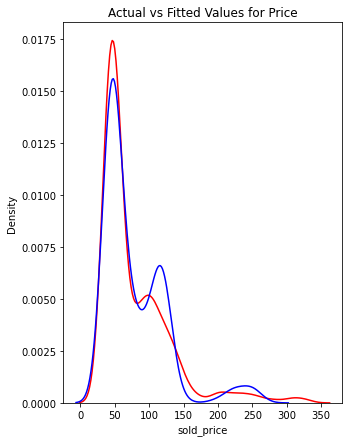

In [85]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

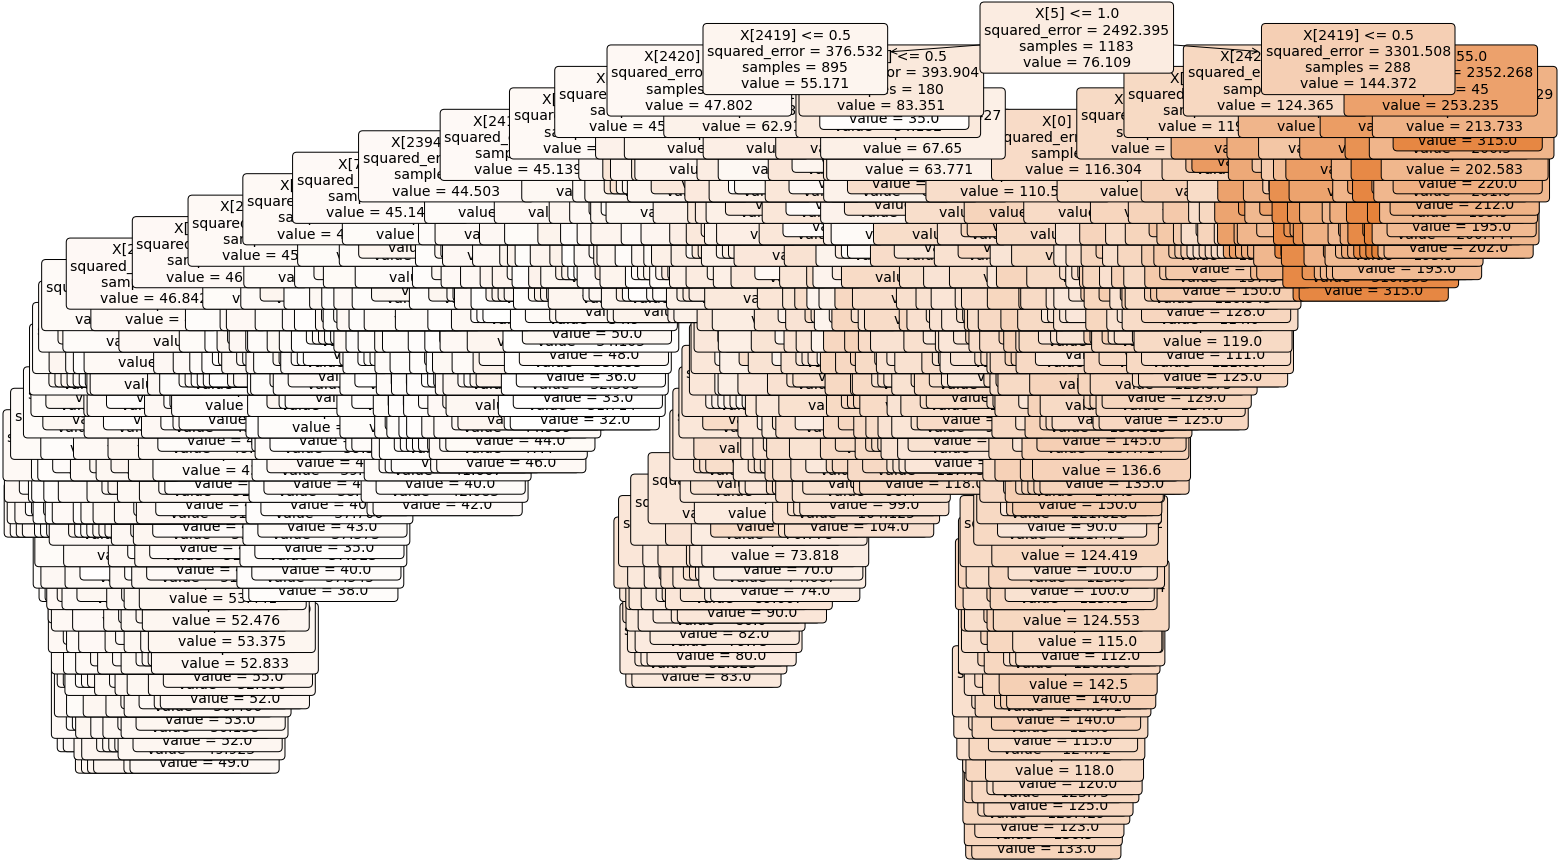

In [87]:

# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15))
tree.plot_tree(Tree,filled=True, 
              rounded=True, 
              fontsize=14);

# Change column datatype

In [52]:
##df['feedback_count'] = df['feedback_count'].astype(np.int64)
##df['sold_price'] = df['sold_price'].astype(np.int64)


# categoricals_features and numericals_features


'https://www.grailed.com/listings/19637389-acne-studios-black-knit-bill-o-reverse'

In [117]:
categoricals_features = df.select_dtypes(object)
categoricals_features = categoricals_features.drop(columns = ['description', 'sub_title', 'condition', 'designer', 'category', 'color', 'review'])
## 

# get dummies pandas
categoricals_features=pd.get_dummies(categoricals_features, drop_first=True)

In [118]:
categoricals_features

size_l  size_m  size_s  size_xl  size_xs  size_xxl  size_xxs  \
0           0       1       0        0        0         0         0   
1           0       1       0        0        0         0         0   
2           0       0       1        0        0         0         0   
3           1       0       0        0        0         0         0   
4           0       1       0        0        0         0         0   
...       ...     ...     ...      ...      ...       ...       ...   
41380       0       1       0        0        0         0         0   
41381       0       1       0        0        0         0         0   
41382       0       0       0        1        0         0         0   
41383       0       0       1        0        0         0         0   
41384       0       0       0        0        0         1         0   

       category_group_bottoms  category_group_footwear  \
0                           0                        0   
1                           0                        0   
2                           0                        0   
3                           0                        0   
4                           0                        0   
...                       ...                      ...   
41380                       0                        0   
41381                       0                        0   
41382                       0                        0   
41383                       0                        0   
41384                       0                        0   

       category_group_outerwear  category_group_tailoring  category_group_top  
0                             0                         0                   1  
1                             0                         0                   1  
2                             0                         0                   1  
3                             0                         0                   1  
4                             0                         0                   1  
...                         ...                       ...                 ...  
41380                         0                         1                   0  
41381                         0                         1                   0  
41382                         0                         1                   0  
41383                         0                         1                   0  
41384                         0                         1                   0  

[41385 rows x 12 columns]

In [119]:
from sklearn.preprocessing import StandardScaler

numericals_features =df._get_numeric_data()
#numericals_features_scaled=StandardScaler().fit_transform(numericals_features)
#numericals_features_scaled = pd.DataFrame(numericals_features_scaled, index= numericals_features.index, columns= numericals_features.columns)


Check Correlation

In [120]:
numericals_features.corr()

sold_price  image_count  feedback_count  \
sold_price            1.000000     0.247724       -0.026199   
image_count           0.247724     1.000000        0.138773   
feedback_count       -0.026199     0.138773        1.000000   
description_length    0.020719     0.359140        0.190732   
sub_title_length     -0.000037     0.161005        0.095830   
condition_encoded    -0.076584     0.182830       -0.001278   
price_group           0.701976     0.156254       -0.010674   
score                 0.064975     0.047121        0.044042   

                    description_length  sub_title_length  condition_encoded  \
sold_price                    0.020719         -0.000037          -0.076584   
image_count                   0.359140          0.161005           0.182830   
feedback_count                0.190732          0.095830          -0.001278   
description_length            1.000000          0.200284           0.148720   
sub_title_length              0.200284          1.000000          -0.082995   
condition_encoded             0.148720         -0.082995           1.000000   
price_group                   0.009154         -0.000839          -0.127613   
score                         0.013447          0.018001          -0.056392   

                    price_group     score  
sold_price             0.701976  0.064975  
image_count            0.156254  0.047121  
feedback_count        -0.010674  0.044042  
description_length     0.009154  0.013447  
sub_title_length      -0.000839  0.018001  
condition_encoded     -0.127613 -0.056392  
price_group            1.000000  0.074361  
score                  0.074361  1.000000

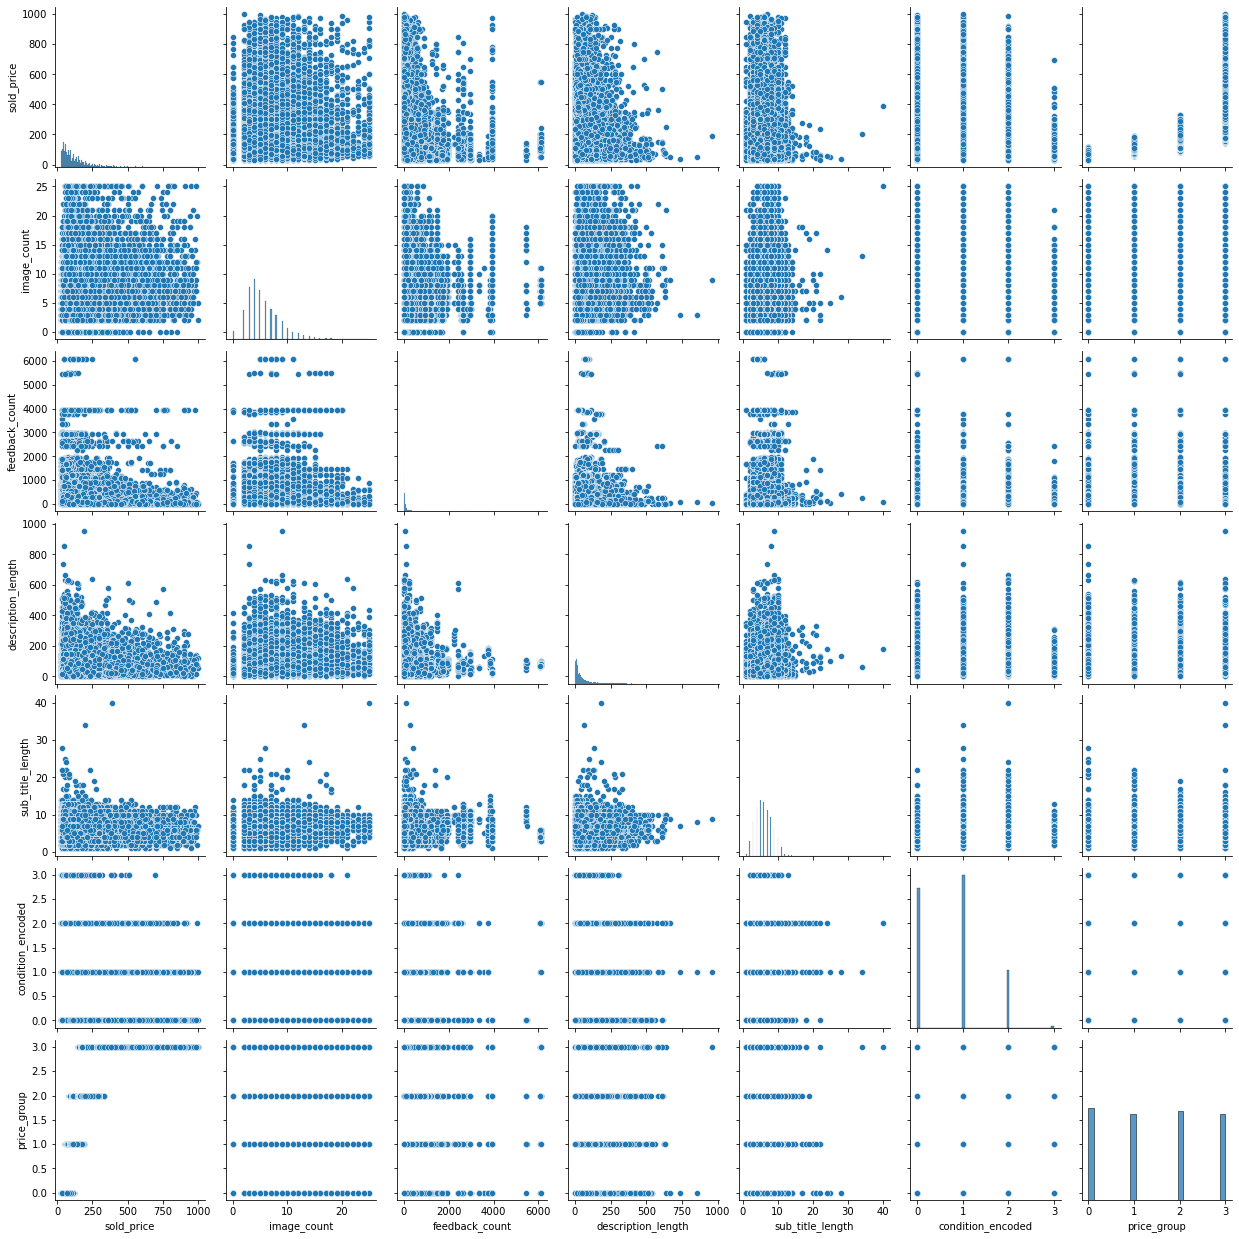

In [58]:
sns.pairplot(df)
plt.show()

In [121]:
all_features=pd.concat([numericals_features, categoricals_features], axis=1) # concat numerical and categorical transformations
all_features
all_features.corr()

sold_price  image_count  feedback_count  \
sold_price                  1.000000     0.247724       -0.026199   
image_count                 0.247724     1.000000        0.138773   
feedback_count             -0.026199     0.138773        1.000000   
description_length          0.020719     0.359140        0.190732   
sub_title_length           -0.000037     0.161005        0.095830   
condition_encoded          -0.076584     0.182830       -0.001278   
price_group                 0.701976     0.156254       -0.010674   
score                       0.064975     0.047121        0.044042   
size_l                      0.000726    -0.002953       -0.025728   
size_m                      0.069161     0.063173       -0.031249   
size_s                      0.035073     0.049387        0.003969   
size_xl                    -0.031460    -0.044055       -0.008749   
size_xs                     0.021893     0.034546        0.000224   
size_xxl                   -0.017294    -0.017557        0.019967   
size_xxs                    0.000112     0.003365        0.011763   
category_group_bottoms     -0.029794     0.089192        0.014695   
category_group_footwear     0.267294     0.149521       -0.075402   
category_group_outerwear    0.172979     0.144060       -0.020892   
category_group_tailoring    0.028588     0.015823       -0.005817   
category_group_top         -0.217140    -0.194157        0.009114   

                          description_length  sub_title_length  \
sold_price                          0.020719         -0.000037   
image_count                         0.359140          0.161005   
feedback_count                      0.190732          0.095830   
description_length                  1.000000          0.200284   
sub_title_length                    0.200284          1.000000   
condition_encoded                   0.148720         -0.082995   
price_group                         0.009154         -0.000839   
score                               0.013447          0.018001   
size_l                             -0.016912          0.000985   
size_m                              0.012193         -0.005483   
size_s                              0.027101         -0.019064   
size_xl                            -0.022385          0.011025   
size_xs                             0.017967          0.003020   
size_xxl                           -0.016285          0.006667   
size_xxs                            0.010018          0.000502   
category_group_bottoms              0.061964         -0.030552   
category_group_footwear            -0.078060          0.036950   
category_group_outerwear            0.077322         -0.030264   
category_group_tailoring            0.011060         -0.007446   
category_group_top                 -0.051338         -0.000132   

                          condition_encoded  price_group     score    size_l  \
sold_price                        -0.076584     0.701976  0.064975  0.000726   
image_count                        0.182830     0.156254  0.047121 -0.002953   
feedback_count                    -0.001278    -0.010674  0.044042 -0.025728   
description_length                 0.148720     0.009154  0.013447 -0.016912   
sub_title_length                  -0.082995    -0.000839  0.018001  0.000985   
condition_encoded                  1.000000    -0.127613 -0.056392  0.020950   
price_group                       -0.127613     1.000000  0.074361  0.004125   
score                             -0.056392     0.074361  1.000000 -0.019908   
size_l                             0.020950     0.004125 -0.019908  1.000000   
size_m                             0.074273     0.008923 -0.007827 -0.386010   
size_s                             0.042693     0.011892  0.031471 -0.241357   
size_xl                           -0.004660    -0.003340  0.019770 -0.186667   
size_xs                            0.009539    -0.000233  0.032949 -0.083010   
size_xxl                          -0.031116    -0.003964  0.004543 -0

# X y spit

In [122]:

X = all_features.drop(columns=['sold_price'], axis = 1)
y= all_features.sold_price

In [123]:
X

image_count  feedback_count  description_length  sub_title_length  \
0                3             6.0                  28                 5   
1                5            11.0                 125                 3   
2                7           219.0                 147                 8   
3                7            15.0                  88                 5   
4                6           163.0                  89                11   
...            ...             ...                 ...               ...   
41380            7           737.0                 115                10   
41381            4             3.0                  37                 3   
41382            7           391.0                  53                 4   
41383            6            10.0                   3                 7   
41384            6             8.0                  21                 5   

       condition_encoded  price_group  score  size_l  size_m  size_s  size_xl  \
0                      2            2    4.8       0       1       0        0   
1                      0            2    NaN       0       1       0        0   
2                      1            1    4.8       0       0       1        0   
3                      1            1    4.9       1       0       0        0   
4                      0            3    5.0       0       1       0        0   
...                  ...          ...    ...     ...     ...     ...      ...   
41380                  1            2    NaN       0       1       0        0   
41381                  1            0    NaN       0       1       0        0   
41382                  1            0    NaN       0       0       0        1   
41383                  0            1    NaN       0       0       1        0   
41384                  1            3    NaN       0       0       0        0   

       size_xs  size_xxl  size_xxs  category_group_bottoms  \
0            0         0         0                       0   
1            0         0         0                       0   
2            0         0         0                       0   
3            0         0         0                       0   
4            0         0         0                       0   
...        ...       ...       ...                     ...   
41380        0         0         0                       0   
41381        0         0         0                       0   
41382        0         0         0                       0   
41383        0         0         0                       0   
41384        0         1         0                       0   

       category_group_footwear  category_group_outerwear  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   
...                        ...                       ...   
41380                        0                         0   
41381                        0                         0   
41382                        0                         0   
41383                        0                         0   
41384                        0                         0   

       category_group_tailoring  category_group_top  
0                             0                   1  
1                             0                   1  
2                             0                   1  
3                             0                   1  
4                             0                   1  
...                         ...                 ...  
41380                         1                   0  
41381                         1                   0  
41382                         1                   0  
41383                         1                   0  
41384                         1                   0  

[41385

In [60]:
y

4         120
6         144
7          70
11         75
12        200
         ... 
81050     195
88741      86
97339      67
97399     111
103218    380
Name: sold_price, Length: 41385, dtype: int64

In [61]:
from scipy import stats
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle


In [62]:
def model_performance(y_train, y_pred_train, y_test, y_pred_test):

    ME_train = np.mean(y_train-y_pred_train)
    ME_test  = np.mean(y_test-y_pred_test)

    MAE_train = mean_absolute_error(y_train,y_pred_train)
    MAE_test  = mean_absolute_error(y_test,y_pred_test)

    MSE_train = mean_squared_error(y_train,y_pred_train)
    MSE_test  = mean_squared_error(y_test,y_pred_test)

    RMSE_train = np.sqrt(MSE_train)
    RMSE_test  = np.sqrt(MSE_test)

    MAPE_train = np.mean((np.abs(y_train-y_pred_train) / y_train)* 100.)
    MAPE_test  = np.mean((np.abs(y_test-y_pred_test) / y_test)* 100.)

    R2_train = r2_score(y_train,y_pred_train)
    R2_test  = r2_score(y_test,y_pred_test)

    performance = pd.DataFrame({'Error_metric': ['Mean error','Mean absolute error','Mean squared error',
                                             'Root mean squared error','Mean absolute percentual error',
                                             'R2'],
                            'Train': [ME_train, MAE_train, MSE_train, RMSE_train, MAPE_train, R2_train],
                            'Test' : [ME_test, MAE_test , MSE_test, RMSE_test, MAPE_test, R2_test]})

    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance, df_train, df_test

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# training datasets to DataFrame again to manipulate them
X_train = pd.DataFrame(X_train, columns= X.columns)
X_test = pd.DataFrame(X_test, columns= X.columns)

In [64]:
#model = linear, ridge, lasso, knn
def regression_gen(regression, num, X_train, X_test, y_train, y_test):
    if regression == 'linear':
        model = LinearRegression()
    elif regression == 'ridge':
        model = Ridge(alpha= num)
    elif regression == 'lasso':
        model = linear_model.Lasso(alpha= num)
    elif regression == 'knn':
        model = KNeighborsRegressor(n_neighbors= num)
        
    trans = PowerTransformer()
    trans.fit(X_train)

    X_train = trans.transform(X_train)
    X_test  = trans.transform(X_test)

    X_train = pd.DataFrame(X_train, columns = X.columns)
    X_test  = pd.DataFrame(X_test,  columns = X.columns)

# model
    model.fit(X_train, y_train)

    y_pred_train_model = model.predict(X_train)
    y_pred_test_model  = model.predict(X_test)
    performance_lm, _, _ = model_performance(y_train, y_pred_train_model, y_test, y_pred_test_model)
    return performance_lm


In [94]:
regression_gen('knn', 9, X_train, X_test, y_train, y_test)

Error_metric   Train    Test
0                      Mean error    1.47    0.85
1             Mean absolute error   35.51   39.84
2              Mean squared error 5160.90 6456.31
3         Root mean squared error   71.84   80.35
4  Mean absolute percentual error   20.36   22.70
5                              R2    0.73    0.67

In [67]:
full = pd.DataFrame()
for k in range(1,21):
    b = regression_gen('knn',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

Error_metric   Train     Test   k
0                      Mean error   -0.00     0.25   1
1             Mean absolute error    0.16    46.77   1
2              Mean squared error    7.98 10334.97   1
3         Root mean squared error    2.82   101.66   1
4  Mean absolute percentual error    0.13    25.85   1
5                              R2    1.00     0.47   1
0                      Mean error    0.21    -0.10   2
1             Mean absolute error   23.77    43.29   2
2              Mean squared error 2641.04  7959.68   2
3         Root mean squared error   51.39    89.22   2
4  Mean absolute percentual error   13.21    23.99   2
5                              R2    0.86     0.59   2
0                      Mean error    0.37    -0.24   3
1             Mean absolute error   29.32    41.90   3
2              Mean squared error 3654.18  7176.30   3
3         Root mean squared error   60.45    84.71   3
4  Mean absolute percentual error   16.28    23.36   3
5                              R2    0.81     0.63   3
0                      Mean error    0.64     0.10   4
1             Mean absolute error   31.66    40.82   4
2              Mean squared error 4152.08  6758.59   4
3         Root mean squared error   64.44    82.21   4
4  Mean absolute percentual error   17.74    22.85   4
5                              R2    0.78     0.65   4
0                      Mean error    0.70     0.10   5
1             Mean absolute error   33.06    40.36   5
2              Mean squared error 4502.52  6602.84   5
3         Root mean squared error   67.10    81.26   5
4  Mean absolute percentual error   18.65    22.67   5
5                              R2    0.76     0.66   5
0                      Mean error    1.03     0.14   6
1             Mean absolute error   33.90    40.23   6
2              Mean squared error 4727.58  6565.96   6
3         Root mean squared error   68.76    81.03   6
4  Mean absolute percentual error   19.22    22.72   6
5                              R2    0.75     0.66   6
0                      Mean error    1.20     0.38   7
1             Mean absolute error   34.55    39.95   7
2              Mean squared error 4891.64  6467.34   7
3         Root mean squared error   69.94    80.42   7
4  Mean absolute percentual error   19.67    22.67   7
5                              R2    0.74     0.67   7
0                      Mean error    1.36     0.67   8
1             Mean absolute error   35.07    39.92   8
2              Mean squared error 5039.12  6479.36   8
3         Root mean squared error   70.99    80.49   8
4  Mean absolute percentual error   20.03    22.68   8
5                              R2    0.74     0.67   8
0                      Mean error    1.47     0.85   9
1             Mean absolute error   35.51    39.84   9
2              Mean squared error 5160.90  6456.31   9
3         Root mean squared error   71.84    80.35   9
4  Mean absolute percentual error   20.36    22.70   9
5                              R2    0.73     0.67   9
0                      Mean error    1.58     1.21  10
1             Mean absolute error   35.84    39.67  10
2              Mean squared error 5274.89  6417.99  10
3         Root mean squared error   72.63    80.11  10
4  Mean absolute percentual error   20.62    22.62  10
5                              R2    0.72     0.67  10
0                      Mean error    1.61     1.40  11
1             Mean absolute error   36.10    39.53  11
2              Mean squared error 5350.33  6383.34  11
3         Root mean squared error   73.15    79.90  11
4  Mean absolute percentual error   20.86    22.61  11
5                              R2    0.72     0.67  11
0                      Mean error    1.70     1.51  12
1             Mean absolute error   36.41    39.48  12
2              Mean squared error 5447.86  6390.76  12
3         Root mean squared error   73.81    79.94  12
4  Mean absolute percentual error   21.09    22.67  12
5                              R2    0.71     0.67  12
0     

In [68]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   1.00  0.47   1
5           R2   0.86  0.59   2
5           R2   0.81  0.63   3
5           R2   0.78  0.65   4
5           R2   0.76  0.66   5
5           R2   0.75  0.66   6
5           R2   0.74  0.67   7
5           R2   0.74  0.67   8
5           R2   0.73  0.67   9
5           R2   0.72  0.67  10
5           R2   0.72  0.67  11
5           R2   0.71  0.67  12
5           R2   0.71  0.67  13
5           R2   0.71  0.67  14
5           R2   0.71  0.67  15
5           R2   0.70  0.67  16
5           R2   0.70  0.67  17
5           R2   0.70  0.67  18
5           R2   0.69  0.66  19
5           R2   0.69  0.66  20

In [69]:
full2 = full.melt(id_vars=['k','Error_metric'])

In [75]:
IPython_default = plt.rcParams.copy()
from matplotlib import cycler
plt.rcParams.update({'text.color' : "white",
                     'axes.labelcolor' : "white",
                     'xtick.color' : 'white',
                     'ytick.color' : 'white'
                    })


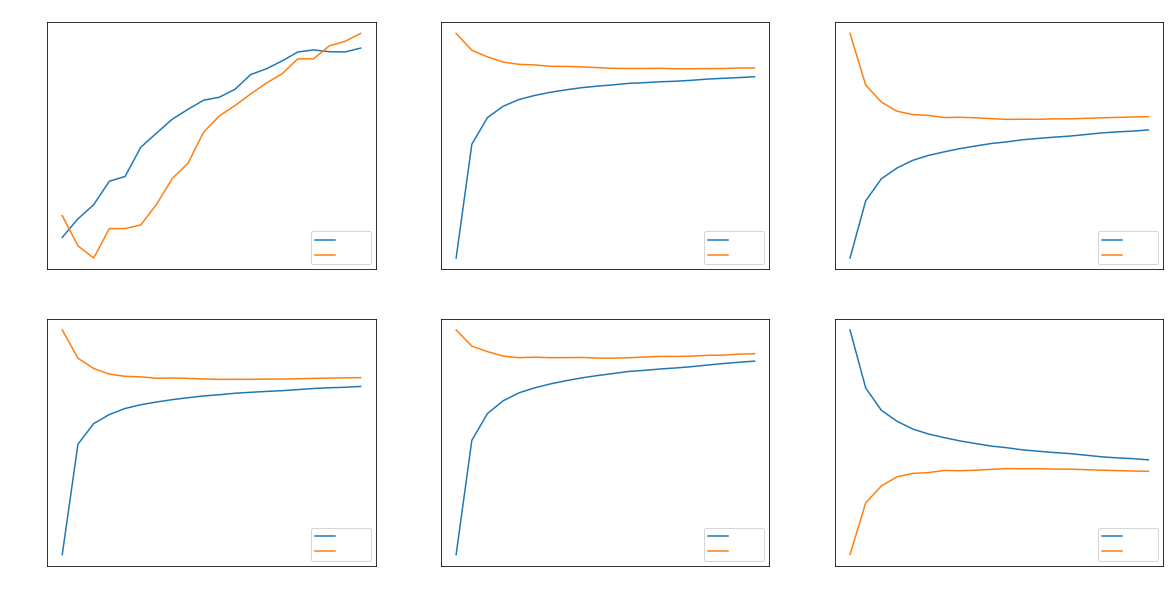

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#metrics = ['Mean error',]'Mean absolute error',...]

fig, ax = plt.subplots(2,3, figsize=(20,10))
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean error'], hue = 'variable', ax = ax[0,0])
ax[0,0].set_xticks(range(2,21))
ax[0,0].set_title("Mean error")
ax[0,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute error'], hue = 'variable', ax = ax[0,1])
ax[0,1].set_xticks(range(2,21))
ax[0,1].set_title("Mean absolute error")
ax[0,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean squared error'], hue = 'variable', ax = ax[0,2])
ax[0,2].set_xticks(range(2,21))
ax[0,2].set_title("Mean squared error")
ax[0,2].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Root mean squared error'], hue = 'variable', ax = ax[1,0])
ax[1,0].set_xticks(range(2,21))
ax[1,0].set_title("Root mean squared error")
ax[1,0].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'Mean absolute percentual error'], hue = 'variable', ax = ax[1,1])
ax[1,1].set_xticks(range(2,21))
ax[1,1].set_title("Mean absolute percentual error")
ax[1,1].legend(loc='lower right')
sns.lineplot(x = 'k', y = 'value', data = full2[full2['Error_metric'] == 'R2'], hue = 'variable', ax = ax[1,2])
ax[1,2].set_xticks(range(2,21))
ax[1,2].set_title("R2")
ax[1,2].legend(loc='lower right')

In [81]:
regression_gen('lasso', 0.1, X_train, X_test, y_train, y_test)

Error_metric   Train    Test
0                      Mean error    0.00    0.23
1             Mean absolute error   56.91   57.78
2              Mean squared error 7590.13 7998.78
3         Root mean squared error   87.12   89.44
4  Mean absolute percentual error   58.66   59.74
5                              R2    0.59    0.58

In [91]:
full = pd.DataFrame()
for k in range(0,21):
    b = regression_gen('lasso',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

/var/folders/3r/vv8m2rv95fz7qh9n60xh60y40000gp/T/ipykernel_68998/3634243592.py:22: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train, y_train)
/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/AnnyY/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.180e+08, tolerance: 5.828e+04 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/R

Error_metric   Train    Test   k
0                      Mean error   -0.00    0.26   0
1             Mean absolute error   56.88   57.77   0
2              Mean squared error 7587.70 7999.70   0
3         Root mean squared error   87.11   89.44   0
4  Mean absolute percentual error   58.73   59.84   0
5                              R2    0.59    0.58   0
0                      Mean error   -0.00    0.21   1
1             Mean absolute error   56.69   57.49   1
2              Mean squared error 7609.10 8007.75   1
3         Root mean squared error   87.23   89.49   1
4  Mean absolute percentual error   57.66   58.68   1
5                              R2    0.59    0.58   1
0                      Mean error   -0.00    0.21   2
1             Mean absolute error   56.42   57.15   2
2              Mean squared error 7642.51 8035.53   2
3         Root mean squared error   87.42   89.64   2
4  Mean absolute percentual error   56.52   57.45   2
5                              R2    0.59    0.58   2
0                      Mean error   -0.00    0.24   3
1             Mean absolute error   56.17   56.84   3
2              Mean squared error 7684.35 8075.16   3
3         Root mean squared error   87.66   89.86   3
4  Mean absolute percentual error   55.35   56.23   3
5                              R2    0.59    0.58   3
0                      Mean error    0.00    0.24   4
1             Mean absolute error   55.91   56.55   4
2              Mean squared error 7728.79 8116.96   4
3         Root mean squared error   87.91   90.09   4
4  Mean absolute percentual error   54.15   55.00   4
5                              R2    0.59    0.58   4
0                      Mean error   -0.00    0.23   5
1             Mean absolute error   55.64   56.27   5
2              Mean squared error 7767.89 8154.91   5
3         Root mean squared error   88.14   90.30   5
4  Mean absolute percentual error   52.97   53.79   5
5                              R2    0.59    0.57   5
0                      Mean error   -0.00    0.20   6
1             Mean absolute error   55.37   55.97   6
2              Mean squared error 7807.54 8193.63   6
3         Root mean squared error   88.36   90.52   6
4  Mean absolute percentual error   51.78   52.56   6
5                              R2    0.58    0.57   6
0                      Mean error   -0.00    0.18   7
1             Mean absolute error   55.11   55.69   7
2              Mean squared error 7854.40 8239.60   7
3         Root mean squared error   88.63   90.77   7
4  Mean absolute percentual error   50.60   51.35   7
5                              R2    0.58    0.57   7
0                      Mean error   -0.00    0.16   8
1             Mean absolute error   54.87   55.44   8
2              Mean squared error 7908.48 8292.83   8
3         Root mean squared error   88.93   91.06   8
4  Mean absolute percentual error   49.43   50.15   8
5                              R2    0.58    0.57   8
0                      Mean error    0.00    0.14   9
1             Mean absolute error   54.66   55.21   9
2              Mean squared error 7969.76 8353.31   9
3         Root mean squared error   89.27   91.40   9
4  Mean absolute percentual error   48.28   48.96   9
5                              R2    0.57    0.56   9
0                      Mean error   -0.00    0.11  10
1             Mean absolute error   54.47   54.99  10
2              Mean squared error 8038.26 8421.05  10
3         Root mean squared error   89.66   91.77  10
4  Mean absolute percentual error   47.14   47.78  10
5                              R2    0.57    0.56  10
0                      Mean error   -0.00    0.09  11
1             Mean absolute error   54.29   54.80  11
2              Mean squared error 8113.97 8496.05  11
3         Root mean squared error   90.08   92.17  11
4  Mean absolute percentual error   46.01   46.62  11
5                              R2    0.57    0.56  11
0                      Mean error   -0.00    0.07  12
1             Mean absolu

In [92]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   0.59  0.58   0
5           R2   0.59  0.58   1
5           R2   0.59  0.58   2
5           R2   0.59  0.58   3
5           R2   0.59  0.58   4
5           R2   0.59  0.57   5
5           R2   0.58  0.57   6
5           R2   0.58  0.57   7
5           R2   0.58  0.57   8
5           R2   0.57  0.56   9
5           R2   0.57  0.56  10
5           R2   0.57  0.56  11
5           R2   0.56  0.55  12
5           R2   0.56  0.55  13
5           R2   0.55  0.54  14
5           R2   0.55  0.54  15
5           R2   0.54  0.53  16
5           R2   0.53  0.52  17
5           R2   0.53  0.52  18
5           R2   0.52  0.51  19
5           R2   0.51  0.50  20

In [77]:
regression_gen('ridge', 10, X_train, X_test, y_train, y_test)

Error_metric   Train    Test
0                      Mean error    0.00    0.25
1             Mean absolute error   56.87   57.77
2              Mean squared error 7587.70 7999.60
3         Root mean squared error   87.11   89.44
4  Mean absolute percentual error   58.71   59.81
5                              R2    0.59    0.58

In [87]:
full = pd.DataFrame()
for k in range(1,21):
    b = regression_gen('ridge',k, X_train, X_test, y_train, y_test)
    b["k"]= [k]*6
    full = pd.concat([full,b], axis=0)
    
full

Error_metric   Train    Test   k
0                      Mean error    0.00    0.26   1
1             Mean absolute error   56.88   57.77   1
2              Mean squared error 7587.70 7999.69   1
3         Root mean squared error   87.11   89.44   1
4  Mean absolute percentual error   58.73   59.83   1
5                              R2    0.59    0.58   1
0                      Mean error    0.00    0.26   2
1             Mean absolute error   56.88   57.77   2
2              Mean squared error 7587.70 7999.68   2
3         Root mean squared error   87.11   89.44   2
4  Mean absolute percentual error   58.73   59.83   2
5                              R2    0.59    0.58   2
0                      Mean error    0.00    0.26   3
1             Mean absolute error   56.88   57.77   3
2              Mean squared error 7587.70 7999.67   3
3         Root mean squared error   87.11   89.44   3
4  Mean absolute percentual error   58.72   59.83   3
5                              R2    0.59    0.58   3
0                      Mean error   -0.00    0.26   4
1             Mean absolute error   56.88   57.77   4
2              Mean squared error 7587.70 7999.66   4
3         Root mean squared error   87.11   89.44   4
4  Mean absolute percentual error   58.72   59.83   4
5                              R2    0.59    0.58   4
0                      Mean error   -0.00    0.26   5
1             Mean absolute error   56.88   57.77   5
2              Mean squared error 7587.70 7999.65   5
3         Root mean squared error   87.11   89.44   5
4  Mean absolute percentual error   58.72   59.82   5
5                              R2    0.59    0.58   5
0                      Mean error    0.00    0.26   6
1             Mean absolute error   56.88   57.77   6
2              Mean squared error 7587.70 7999.64   6
3         Root mean squared error   87.11   89.44   6
4  Mean absolute percentual error   58.72   59.82   6
5                              R2    0.59    0.58   6
0                      Mean error   -0.00    0.26   7
1             Mean absolute error   56.87   57.77   7
2              Mean squared error 7587.70 7999.63   7
3         Root mean squared error   87.11   89.44   7
4  Mean absolute percentual error   58.71   59.82   7
5                              R2    0.59    0.58   7
0                      Mean error   -0.00    0.26   8
1             Mean absolute error   56.87   57.77   8
2              Mean squared error 7587.70 7999.62   8
3         Root mean squared error   87.11   89.44   8
4  Mean absolute percentual error   58.71   59.81   8
5                              R2    0.59    0.58   8
0                      Mean error   -0.00    0.25   9
1             Mean absolute error   56.87   57.77   9
2              Mean squared error 7587.70 7999.61   9
3         Root mean squared error   87.11   89.44   9
4  Mean absolute percentual error   58.71   59.81   9
5                              R2    0.59    0.58   9
0                      Mean error    0.00    0.25  10
1             Mean absolute error   56.87   57.77  10
2              Mean squared error 7587.70 7999.60  10
3         Root mean squared error   87.11   89.44  10
4  Mean absolute percentual error   58.71   59.81  10
5                              R2    0.59    0.58  10
0                      Mean error   -0.00    0.25  11
1             Mean absolute error   56.87   57.76  11
2              Mean squared error 7587.70 7999.59  11
3         Root mean squared error   87.11   89.44  11
4  Mean absolute percentual error   58.70   59.81  11
5                              R2    0.59    0.58  11
0                      Mean error   -0.00    0.25  12
1             Mean absolute error   56.87   57.76  12
2              Mean squared error 7587.70 7999.58  12
3         Root mean squared error   87.11   89.44  12
4  Mean absolute percentual error   58.70   59.80  12
5                              R2    0.59    0.58  12
0                      Mean error    0.00    0.25  13
1             Mean absolu

In [88]:
full[full['Error_metric'] == 'R2']

Error_metric  Train  Test   k
5           R2   0.59  0.58   1
5           R2   0.59  0.58   2
5           R2   0.59  0.58   3
5           R2   0.59  0.58   4
5           R2   0.59  0.58   5
5           R2   0.59  0.58   6
5           R2   0.59  0.58   7
5           R2   0.59  0.58   8
5           R2   0.59  0.58   9
5           R2   0.59  0.58  10
5           R2   0.59  0.58  11
5           R2   0.59  0.58  12
5           R2   0.59  0.58  13
5           R2   0.59  0.58  14
5           R2   0.59  0.58  15
5           R2   0.59  0.58  16
5           R2   0.59  0.58  17
5           R2   0.59  0.58  18
5           R2   0.59  0.58  19
5           R2   0.59  0.58  20

In [78]:
regression_gen('linear',np.nan, X_train, X_test, y_train, y_test)

Error_metric   Train    Test
0                      Mean error   -0.00    0.26
1             Mean absolute error   56.88   57.77
2              Mean squared error 7587.70 7999.70
3         Root mean squared error   87.11   89.44
4  Mean absolute percentual error   58.73   59.84
5                              R2    0.59    0.58

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

c = abs(all_features.corr())
#c

#fig, ax = plt.subplots(figsize=(14,14))
#sns.heatmap(c, annot=True);

#c['SalePrice']
c_last = c['sold_price'].sort_values(ascending=False)
#c_last
c_thr = .05
cols_to_keep = list(c_last[c_last > c_thr].index)[1:] + [list(c_last[c_last > c_thr].index)[0]]
print(cols_to_keep)

all_features[cols_to_keep]

['price_group', 'category_group_footwear', 'image_count', 'category_group_top', 'category_group_outerwear', 'condition_encoded', 'size_m', 'sold_price']


price_group  category_group_footwear  image_count  category_group_top  \
4                 2                        0            3                   1   
6                 2                        0            5                   1   
7                 1                        0            7                   1   
11                1                        0            7                   1   
12                3                        0            6                   1   
...             ...                      ...          ...                 ...   
81050             2                        0            7                   0   
88741             0                        0            4                   0   
97339             0                        0            7                   0   
97399             1                        0            6                   0   
103218            3                        0            6                   0   

        category_group_outerwear  condition_encoded  size_m  sold_price  
4                              0                  2       1         120  
6                              0                  0       1         144  
7                              0                  1       0          70  
11                             0                  1       0          75  
12                             0                  0       1         200  
...                          ...                ...     ...         ...  
81050                          0                  1       1         195  
88741                          0                  1       1          86  
97339                          0                  1       0          67  
97399                          0                  0       0         111  
103218                         0                  1       0         380  

[41385 rows x 8 columns]

In [130]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


#X_train.isna().sum()
nulls = pd.DataFrame(X_train.isna().sum()).reset_index()
#nulls.head()
nulls.columns = ['Column','nas']
#nulls.head()
#nulls[nulls['nas'] > 0].head()
cols_to_drop = nulls[nulls['nas'] > 0]['Column'] # Too drastic, but made on pourpose for quick filtering (don't do this in production!!)

X_train.drop(columns=cols_to_drop, axis=1, inplace = True)
X_test.drop(columns=cols_to_drop, axis=1, inplace = True)

#display(X_train)
knn = KNeighborsRegressor()

lm = LinearRegression()

selector = RFE(knn, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Fitting estimator with 18 features.


ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsRegressor should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

sold_price                   designer              category  \
54940           21                       MNML  Sweatpants & Joggers   
18933           21                       Nike  Sweatpants & Joggers   
44655           21                    Supreme                 Denim   
2586            21                       Nike  Sweatpants & Joggers   
14191           21  American Eagle Outfitters          Casual Pants   
14208           21  American Eagle Outfitters                 Denim   
54942           21                       MNML  Sweatpants & Joggers   
79501           21                     Pacsun                Shorts   
62557           21               Michael Kors          Casual Pants   
20920           21               Calvin Klein                 Denim   
14223           21  American Eagle Outfitters                 Denim   
79423           21                     Pacsun                 Denim   
79478           21                     Pacsun  Sweatpants & Joggers   
74163           22                Nudie Jeans                 Denim   
28258           22                 Streetwear              Swimwear   
84512           22                     Adidas          Casual Pants   
14153           22  American Eagle Outfitters  Sweatpants & Joggers   
14155           22  American Eagle Outfitters                 Denim   
87995           22                        R13                 Denim   
24728           22                   Champion  Sweatpants & Joggers   
39675           22                        H&M  Sweatpants & Joggers   
39676           22                        H&M  Sweatpants & Joggers   
51117           22                     Levi'S                 Denim   
14181           22  American Eagle Outfitters                 Denim   
45774           22                        Huf  Sweatpants & Joggers   
80604           22                  Patagonia          Casual Pants   
86721           22                       Puma                Shorts   
54926           22                       MNML                 Denim   
14204           22  American Eagle Outfitters          Casual Pants   
29696           22                       Nike  Sweatpants & Joggers   
72783           22                    No Name  Overalls & Jumpsuits   
79417           22                     Pacsun  Sweatpants & Joggers   
92843           22                     Pacsun                Shorts   
86756           22                       Puma                Shorts   
57385           22                       Nike                Shorts   
102206          22                   Carhartt                 Denim   
39640           23                        H&M          Casual Pants   
6406            23                     Adidas                Shorts   
75281           23                       Obey  Sweatpants & Joggers   
102196          23                       Nike  Sweatpants & Joggers   
3994            23                 Streetwear                 Denim   
39661           23                        H&M          Casual Pants   
48482           23                     Levi'S          Casual Pants   
18884           23                     Adidas                Shorts   
14148           23  American Eagle Outfitters                 Denim   
50780           23                     Uniqlo         Cropped Pants   
14160           23  American Eagle Outfitters                 Denim   
18887           23                       Nike                Shorts   
14192           23  American Eagle Outfitters                 Denim   
50831           23                     Uniqlo          Casual Pants   
51001           23                     Levi'S          Casual Pants   
62520           23               Michael Kors          Casual Pants   
38864           23                      Guess                 Denim   
87041           23                        H&M  Sweatpants & Joggers   
76841           23                    Only Ny          Casual Pants   
71711           23              

In [143]:
    if regression == 'linear':
        model = LinearRegression()
    elif regression == 'ridge':
        model = Ridge(alpha= num)
    elif regression == 'lasso':
        model = linear_model.Lasso(alpha= num)
    elif regression == 'knn':
        model = KNeighborsRegressor(n_neighbors= num)

NameError: name 'regression' is not defined

In [95]:
model=KNeighborsRegressor(n_neighbors= 9)    # model
model.fit(X_train.to_numpy(), y_train)   # model train

KNeighborsRegressor(n_neighbors=9)

In [89]:
y_pred=model.predict(X_test.to_numpy())   # model prediction


y_pred_train=model.predict(X_train.to_numpy())

NameError: name 'model' is not defined

NameError: name 'y_pred_train' is not defined

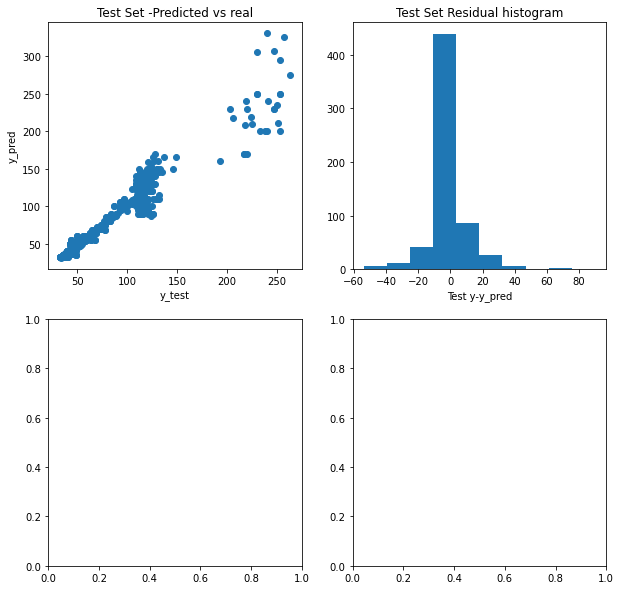

In [90]:
# Make an scatter plot y_pred vs y
# What kind of plot you will get if all the all the predictions are ok?
# A stright line

fig, ax = plt.subplots(2,2,figsize=(10,10))
ax[0,0].plot(y_pred, y_test, 'o')
ax[0,0].set_xlabel("y_test")
ax[0,0].set_ylabel("y_pred")
ax[0,0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[0,1].hist(y_test - y_pred)
ax[0,1].set_xlabel("Test y-y_pred")
ax[0,1].set_title("Test Set Residual histogram")

ax[1,0].plot(y_pred_train, y_train, 'o')
ax[1,0].set_xlabel("y_train")
ax[1,0].set_ylabel("y_pred_train")
ax[1,0].set_title("Train set Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1,1].hist(y_train - y_pred_train)
ax[1,1].set_xlabel("Train y-y_pred")
ax[1,1].set_title("Train Residual histogram")

In [98]:
train_mse=mse(y_train,model.predict(X_train.to_numpy()))
test_mse=mse(y_test,model.predict(X_test.to_numpy()))

print ('train MSE: {} -- test MSE: {}'.format(train_mse, test_mse))

train MSE: 10674.852682880679 -- test MSE: 13725.796833237879


In [99]:
print ('train RMSE: {} -- test RMSE: {}'.format(train_mse**.5, test_mse**.5))

train RMSE: 103.31917867889136 -- test RMSE: 117.15714589062794


In [100]:
train_mae=mae(y_train,model.predict(X_train.to_numpy()))
test_mae=mae(y_test,model.predict(X_test.to_numpy()))

print ('train MAE: {} -- test MAE: {}'.format(train_mse, test_mse))

train MAE: 10674.852682880679 -- test MAE: 13725.796833237879


In [101]:
r2= model.score(X_test.to_numpy(), y_test)
print (r2)

print(r2_score(y_test,model.predict(X_test.to_numpy())))

0.29035742299320544
0.29035742299320544


In [102]:
N=X_train.shape[0]
p=36
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  0.2894744168832841


In [103]:
X_train_const = sm.add_constant(X_train) # adding a constant

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const) 

X_test_const = sm.add_constant(X_test) # adding a constant
predictions_test = model.predict(X_test_const) 
print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:             sold_price   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     2588.
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        11:00:18   Log-Likelihood:            -1.6998e+05
No. Observations:               28969   AIC:                         3.400e+05
Df Residuals:                   28950   BIC:                         3.401e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# NLP

In [135]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')

[nltk_data] Downloading package punkt to /Users/AnnyY/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/AnnyY/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/AnnyY/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to /Users/AnnyY/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

## Dealing with description_length

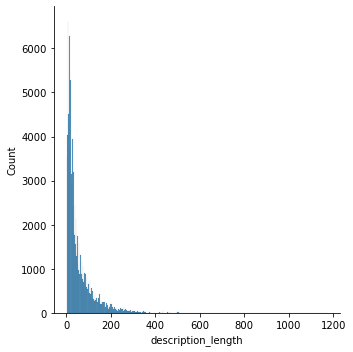

In [138]:
sns.displot(x=df['description_length'])

In [139]:
df['description_length'].describe()

count    102335.000000
mean         54.383163
std          65.275804
min           1.000000
25%          14.000000
50%          30.000000
75%          70.000000
max        1172.000000
Name: description_length, dtype: float64

In [140]:
m = df['description_length'].median()
m

30.0

Intuitivelly, we can consider short reviews as totally useless because they are not properly justified and they can mislead the model.

According to the median length, a reasonable guess will be to filter out reviews for which the length is smaller than the median.

In [141]:
df = df[df['description_length'] > m]
df.shape

(50466, 13)

## Merging description

In [142]:
descriptions = ['']
corpus_description = []
for description in df['description']:
    descriptions.append(description)
    corpus_description.append(nltk.sent_tokenize(description))  

In [143]:
corpus_description=[sent for sublist in corpus_description for sent in sublist]

In [144]:
len(corpus_description)

315721

In [145]:
for i in range(len(corpus_description)):
    corpus_description[i] = corpus_description[i].lower()
    corpus_description[i] = re.sub(r'\W+',' ',corpus_description[i]) # Replace everything non-alpahnumeric by ' '
    corpus_description[i] = re.sub(r'\s+',' ',corpus_description[i]) # Replace one or more whitespaces by  ' '
    corpus_description[i] = re.sub(r'\d+',' ',corpus_description[i]) # Replace one or more digits by  ' '
    corpus_description[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus_description[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus_description[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus_description[i]) 
    # Replace html tags by ''
    corpus_description[i] = BeautifulSoup(corpus_description[i], 'html.parser').get_text().strip()

In [146]:
print(len(corpus_description))

315721


In [147]:
print(corpus_description[14])

european countries     days with standart shipping or     days with extra delivery   we do not accept returns so be free to ask any questions before a purchase ig casualhead if you have time please check my other posts


## Tokenizing the corpus_description

In [148]:
wordfreq = {}
for sentence in corpus_description:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter
    

In [149]:
# words appeared.
len(list(wordfreq.keys()))

33809

In [150]:
wordfreq

{'hi': 425,
 'never': 4261,
 'worn': 11630,
 'condition': 43731,
 'u': 1531,
 'can': 13193,
 'see': 9779,
 'all': 37607,
 'on': 38537,
 'a': 59522,
 'photo': 2868,
 'ready': 3331,
 'to': 107795,
 'discuss': 385,
 'offers': 10437,
 'you': 50834,
 'ask': 13434,
 'any': 24936,
 'questions': 16381,
 'carefully': 4192,
 'look': 4280,
 'at': 9588,
 'the': 110292,
 'measurements': 24136,
 'they': 4315,
 'are': 33102,
 'accurate': 442,
 'cm': 18836,
 'returns': 8542,
 'due': 3244,
 'wrong': 879,
 'size': 41389,
 'not': 20963,
 'accepted': 2653,
 'if': 26260,
 'there': 4209,
 'is': 44397,
 'no': 31098,
 'obvious': 82,
 'error': 267,
 'ヽ': 2623,
 'ゝ': 6,
 'ノ': 7,
 '_': 194,
 'i': 35803,
 'send': 3702,
 'parcels': 482,
 'without': 1783,
 'tax': 2280,
 'as': 21595,
 'gift': 3681,
 'within': 10079,
 'hours': 2612,
 'after': 11970,
 'payment': 14894,
 'cost': 2282,
 'of': 41742,
 'shipping': 42585,
 'included': 2314,
 'it': 24784,
 'indicated': 140,
 'in': 59347,
 'column': 24,
 'usually': 3857,
 't

In [151]:
# Word list cleaning.
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [152]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [153]:
corpus_description = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [154]:
corpus_description

[(425, 'hi'),
 (4261, 'never'),
 (11630, 'worn'),
 (43731, 'condition'),
 (1531, 'u'),
 (9779, 'see'),
 (2868, 'photo'),
 (3331, 'ready'),
 (385, 'discuss'),
 (10437, 'offers'),
 (13434, 'ask'),
 (16381, 'questions'),
 (4192, 'carefully'),
 (4280, 'look'),
 (24136, 'measurements'),
 (442, 'accurate'),
 (18836, 'cm'),
 (8542, 'returns'),
 (3244, 'due'),
 (879, 'wrong'),
 (41389, 'size'),
 (2653, 'accepted'),
 (82, 'obvious'),
 (267, 'error'),
 (2623, 'ヽ'),
 (6, 'ゝ'),
 (7, 'ノ'),
 (194, '_'),
 (3702, 'send'),
 (482, 'parcels'),
 (1783, 'without'),
 (2280, 'tax'),
 (3681, 'gift'),
 (10079, 'within'),
 (2612, 'hours'),
 (14894, 'payment'),
 (2282, 'cost'),
 (42585, 'shipping'),
 (2314, 'included'),
 (140, 'indicated'),
 (24, 'column'),
 (3857, 'usually'),
 (3319, 'takes'),
 (4393, 'weeks'),
 (1038, 'guarantee'),
 (457, 'depend'),
 (3, 'overpay'),
 (2366, 'super'),
 (7394, 'express'),
 (24325, 'days'),
 (7749, 'great'),
 (12925, 'tag'),
 (25, 'ladies'),
 (6499, 'follow'),
 (20740, 'new'),
 (

Let's sort the words by frequency and get the 20 most frequent words. We will use these "most frequent" words as the columns of our dataframe.
This value of 20 has to be chosen looking for a compromise between having a good accuracy and not too many columns in the dataset. Probably you would like to increase this value. However, for ilustrative purposes we're going to use this value.

In [155]:
corpus_description.sort(reverse = True)

# Here we keep only the 20 most frequent words but it can be changed to another bigger value
corpus_description_freq = [(word[1],word[0]) for word in corpus_description[:31]] 
corpus_description_freq = corpus_description_freq[1:]
corpus_description_freq

[('condition', 43731),
 ('shipping', 42585),
 ('size', 41389),
 ('item', 33981),
 ('items', 24899),
 ('days', 24325),
 ('measurements', 24136),
 ('new', 20740),
 ('inches', 19433),
 ('cm', 18836),
 ('length', 17382),
 ('questions', 16381),
 ('vintage', 15335),
 ('check', 15265),
 ('number', 15220),
 ('used', 15054),
 ('payment', 14894),
 ('pit', 14707),
 ('good', 13910),
 ('ask', 13434),
 ('ship', 13152),
 ('tag', 12925),
 ('free', 12844),
 ('us', 12789),
 ('purchase', 11980),
 ('made', 11960),
 ('worn', 11630),
 ('day', 11250),
 ('price', 10960),
 ('like', 10927)]

In [156]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

corpus_description_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_description_freq]
corpus_description_freq

[('condition', 43731),
 ('shipping', 42585),
 ('size', 41389),
 ('item', 33981),
 ('item', 24899),
 ('day', 24325),
 ('measurement', 24136),
 ('new', 20740),
 ('inch', 19433),
 ('cm', 18836),
 ('length', 17382),
 ('question', 16381),
 ('vintage', 15335),
 ('check', 15265),
 ('number', 15220),
 ('used', 15054),
 ('payment', 14894),
 ('pit', 14707),
 ('good', 13910),
 ('ask', 13434),
 ('ship', 13152),
 ('tag', 12925),
 ('free', 12844),
 ('u', 12789),
 ('purchase', 11980),
 ('made', 11960),
 ('worn', 11630),
 ('day', 11250),
 ('price', 10960),
 ('like', 10927)]

In [157]:
## Creating dataframe

In [158]:
cols = {word[0]: [] for word in corpus_description_freq}
description_reviews = pd.DataFrame(cols)

description_reviews

Empty DataFrame
Columns: [condition, shipping, size, item, day, measurement, new, inch, cm, length, question, vintage, check, number, used, payment, pit, good, ask, ship, tag, free, u, purchase, made, worn, price, like]
Index: []

In [159]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [160]:
my_list = list( map(review_inpector, df['description'], 
                    [stop_words]*df.shape[0], [list(cols.keys())]*df.shape[0] ) )

my_list[:2]

[{'condition': 1,
  'shipping': 3,
  'size': 1,
  'item': 0,
  'day': 1,
  'measurement': 1,
  'new': 0,
  'inch': 0,
  'cm': 1,
  'length': 0,
  'question': 1,
  'vintage': 0,
  'check': 0,
  'number': 0,
  'used': 0,
  'payment': 1,
  'pit': 0,
  'good': 0,
  'ask': 1,
  'ship': 0,
  'tag': 0,
  'free': 0,
  'u': 1,
  'purchase': 0,
  'made': 0,
  'worn': 1,
  'price': 0,
  'like': 0},
 {'condition': 1,
  'shipping': 5,
  'size': 1,
  'item': 2,
  'day': 4,
  'measurement': 0,
  'new': 2,
  'inch': 0,
  'cm': 0,
  'length': 0,
  'question': 1,
  'vintage': 0,
  'check': 1,
  'number': 3,
  'used': 0,
  'payment': 0,
  'pit': 0,
  'good': 0,
  'ask': 1,
  'ship': 0,
  'tag': 1,
  'free': 1,
  'u': 0,
  'purchase': 2,
  'made': 0,
  'worn': 0,
  'price': 0,
  'like': 0}]

In [161]:
my_list

[{'condition': 1,
  'shipping': 3,
  'size': 1,
  'item': 0,
  'day': 1,
  'measurement': 1,
  'new': 0,
  'inch': 0,
  'cm': 1,
  'length': 0,
  'question': 1,
  'vintage': 0,
  'check': 0,
  'number': 0,
  'used': 0,
  'payment': 1,
  'pit': 0,
  'good': 0,
  'ask': 1,
  'ship': 0,
  'tag': 0,
  'free': 0,
  'u': 1,
  'purchase': 0,
  'made': 0,
  'worn': 1,
  'price': 0,
  'like': 0},
 {'condition': 1,
  'shipping': 5,
  'size': 1,
  'item': 2,
  'day': 4,
  'measurement': 0,
  'new': 2,
  'inch': 0,
  'cm': 0,
  'length': 0,
  'question': 1,
  'vintage': 0,
  'check': 1,
  'number': 3,
  'used': 0,
  'payment': 0,
  'pit': 0,
  'good': 0,
  'ask': 1,
  'ship': 0,
  'tag': 1,
  'free': 1,
  'u': 0,
  'purchase': 2,
  'made': 0,
  'worn': 0,
  'price': 0,
  'like': 0},
 {'condition': 3,
  'shipping': 0,
  'size': 2,
  'item': 1,
  'day': 0,
  'measurement': 3,
  'new': 2,
  'inch': 0,
  'cm': 4,
  'length': 1,
  'question': 1,
  'vintage': 0,
  'check': 0,
  'number': 0,
  'used': 0,

In [162]:
description_reviews = pd.DataFrame(my_list)

KeyError: "['shirt' 'see'] not found in axis"

In [164]:
description_reviews

condition  shipping  size  item  day  measurement  new  inch  cm  \
0              1         3     1     0    1            1    0     0   1   
1              1         5     1     2    4            0    2     0   0   
2              3         0     2     1    0            3    2     0   4   
3              0         0     1     0    0            0    1     0   0   
4              1         0     1     0    1            0    0     0   0   
...          ...       ...   ...   ...  ...          ...  ...   ...  ..   
50461          2         1     1     2    1            0    1     0   0   
50462          2         2     2     0    1            1    0     3   3   
50463          4         1     4     7    1            5    1     0   0   
50464          0         0     0     0    0            0    0     0   0   
50465          3         1     2     2    1            1    0     0   3   

       length  question  vintage  check  number  used  payment  pit  good  \
0           0         1        0      0       0     0        1    0     0   
1           0         1        0      1       3     0        0    0     0   
2           1         1        0      0       0     0        0    2     0   
3           0         0        0      0       0     0        0    0     1   
4           0         1        0      0       0     0        0    0     0   
...       ...       ...      ...    ...     ...   ...      ...  ...   ...   
50461       0         1        0      0       0     1        0    0     3   
50462       1         0        0      0       1     0        0    0     1   
50463       0         1        3      0       2     3        1    0     0   
50464       0         0        0      0       0     0        0    0     0   
50465       0         0        0      0       0     0        0    0     0   

       ask  ship  tag  free  u  purchase  made  worn  price  like  
0        1     0    0     0  1         0     0     1      0     0  
1        1     0    1     1  0         2     0     0      0     0  
2        1     0    0     0  0         0     0     0      0     2  
3        0     0    1     0  1         0     0     0      0     0  
4        0     1    0     2  0         1     0     0      0     0  
...    ...   ...  ...   ... ..       ...   ...   ...    ...   ...  
50461    1     0    0     0  0         1     0     0      0     1  
50462    1     2    1     0  2         0     0     0      0     0  
50463    0     0    1     0  1         1     1     0      0     1  
50464    0     0    0     0  0         0     0     0      0     0  
50465    0     0    1     0  0         0     0     0      0     0  

[50466 rows x 28 columns]

In [165]:
df.iat[1,3]

'Great condition Size on tag: S (Ladies) ———————————————— FOLLOW ME! NEW ITEMS POSTED DAILY! IG: Casualhead —————————————————— SHIPPING: 1) USA and Canada: Extra delivery (5-7 days to USA): +15$ (write me about it in the message. we must discuss this additionally.) Standart shipping with track number (15-28 Business Days to USA)/ Shipping to Canada 3-5 weeks. 2)European countries: 10-20 days with Standart shipping or 4-7 days with Extra delivery (+15$) ⛔️We do not accept returns, so be free to ask any questions before a purchase⛔️ IG: Casualhead If you have time, please check my other posts! FOLLOW ME! NEW ITEMS POSTED DAILY! Please leave your phone number on the note while make a purchase, as the shipping company always need the phone number to help delivering. The delivery service may slightly change the delivery time. These reasons do not depend on me. Please relate to this wisely.'

## Dealing with sub title

##Dealing with sub_title_length

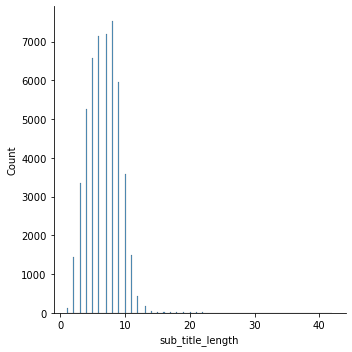

In [166]:
sns.displot(x=df['sub_title_length'])

In [167]:
df['sub_title_length'].describe()

count    50466.000000
mean         6.690128
std          2.469183
min          1.000000
25%          5.000000
50%          7.000000
75%          8.000000
max         42.000000
Name: sub_title_length, dtype: float64

In [168]:
m = df['sub_title_length'].median()
m

7.0

Decide not to drop short sub-title because it suppose to be short.

## Merging description

In [169]:
sub_titles = ['']
corpus_sub_title = []
for sub_title in df['sub_title']:
    sub_titles.append(sub_title)
    corpus_sub_title.append(nltk.sent_tokenize(sub_title))  

In [170]:
corpus_sub_title=[sent for sublist in corpus_sub_title for sent in sublist]

In [171]:
len(corpus_sub_title)

51843

In [172]:
for i in range(len(corpus_sub_title)):
    corpus_sub_title[i] = corpus_sub_title[i].lower()
    corpus_sub_title[i] = re.sub(r'\W+',' ',corpus_sub_title[i]) # Replace everything non-alpahnumeric by ' '
    corpus_sub_title[i] = re.sub(r'\s+',' ',corpus_sub_title[i]) # Replace one or more whitespaces by  ' '
    corpus_sub_title[i] = re.sub(r'\d+',' ',corpus_sub_title[i]) # Replace one or more digits by  ' '
    corpus_sub_title[i] = re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)'," ", corpus_sub_title[i]) # Replace e-mails by ' '
    # Replace urls by ''
    corpus_sub_title[i] = re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', ' ' , corpus_sub_title[i]) 
    # Replace html tags by ''
    corpus_sub_title[i] = BeautifulSoup(corpus_sub_title[i], 'html.parser').get_text().strip()

In [173]:
print(len(corpus_sub_title))

51843


In [174]:
print(corpus_sub_title[14])

acne studios elms print shirt


## Tokenizing the corpus_description

In [175]:
wordfreq = {}
for sentence in corpus_sub_title:
    words = sentence.split()
    #tokens = nltk.word_tokenize(sentence) # To get the words, it can be also done with sentence.split()
    for word in words:
        if ( word not in wordfreq.keys() ): ## first time appearnce in the sentence
            wordfreq[word] = 1 # We initialize the corresponding counter
        else: ## if the world is already existed in the dictionalry 
            wordfreq[word] += 1 # We increase the corresponding counter
    

In [176]:
# words appeared.
len(list(wordfreq.keys()))

16785

In [177]:
wordfreq

{'acne': 72,
 'studios': 121,
 't': 4915,
 'shirt': 8781,
 'lia': 2,
 'mohair': 61,
 'ss': 550,
 'ladies': 9,
 'size': 3199,
 's': 6808,
 'rare': 2023,
 'l': 1319,
 'bnwt': 185,
 'm': 1290,
 'ribbed': 30,
 'zip': 902,
 'up': 730,
 'knitted': 92,
 'jumper': 153,
 'beige': 154,
 'black': 4230,
 'niagara': 3,
 'fl': 5,
 'tee': 5201,
 'fala': 1,
 'print': 809,
 'hoodie': 2882,
 'johna': 1,
 'navy': 613,
 'baby': 121,
 'blue': 1045,
 'reverse': 78,
 'logo': 2265,
 'sweatshirt': 1981,
 'final': 523,
 'price': 180,
 'grail': 34,
 'cashmere': 179,
 'blend': 91,
 'rainbowsweater': 1,
 'unisex': 142,
 'quick': 59,
 'sale': 213,
 'flogho': 1,
 'brand': 531,
 'new': 1799,
 'nicolai': 1,
 'roll': 33,
 'neck': 278,
 'knitwear': 76,
 'measure': 2,
 'elms': 1,
 'slim': 316,
 'stripe': 174,
 'aw': 252,
 'long': 1074,
 'sleeve': 1112,
 'paw': 2,
 'dedicate': 1,
 'wool': 1097,
 'turtle': 24,
 'archive': 74,
 'sweater': 1540,
 'short': 367,
 'mock': 44,
 'viscose': 13,
 'white': 1599,
 'striped': 290,
 'd

In [178]:
# Word list cleaning.
from nltk.corpus import stopwords

stop_words = list(stopwords.words('english')) 
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [179]:
for i in range(len(stop_words)):
    stop_words[i] = re.sub(r"\s*'\s*\w*","",stop_words[i])

#stop_words = [word for word in list(np.unique(stop_words)) if len(word) > 1]
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'you',
 'you',
 'you',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'she',
 'her',
 'hers',
 'herself',
 'it',
 'it',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'that',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'few',
 'more'

In [180]:
corpus_sub_title = [(wordfreq[key],key) for key in list(wordfreq.keys()) if key not in stop_words]

In [181]:
corpus_sub_title

[(72, 'acne'),
 (121, 'studios'),
 (8781, 'shirt'),
 (2, 'lia'),
 (61, 'mohair'),
 (550, 'ss'),
 (9, 'ladies'),
 (3199, 'size'),
 (2023, 'rare'),
 (1319, 'l'),
 (185, 'bnwt'),
 (30, 'ribbed'),
 (902, 'zip'),
 (92, 'knitted'),
 (153, 'jumper'),
 (154, 'beige'),
 (4230, 'black'),
 (3, 'niagara'),
 (5, 'fl'),
 (5201, 'tee'),
 (1, 'fala'),
 (809, 'print'),
 (2882, 'hoodie'),
 (1, 'johna'),
 (613, 'navy'),
 (121, 'baby'),
 (1045, 'blue'),
 (78, 'reverse'),
 (2265, 'logo'),
 (1981, 'sweatshirt'),
 (523, 'final'),
 (180, 'price'),
 (34, 'grail'),
 (179, 'cashmere'),
 (91, 'blend'),
 (1, 'rainbowsweater'),
 (142, 'unisex'),
 (59, 'quick'),
 (213, 'sale'),
 (1, 'flogho'),
 (531, 'brand'),
 (1799, 'new'),
 (1, 'nicolai'),
 (33, 'roll'),
 (278, 'neck'),
 (76, 'knitwear'),
 (2, 'measure'),
 (1, 'elms'),
 (316, 'slim'),
 (174, 'stripe'),
 (252, 'aw'),
 (1074, 'long'),
 (1112, 'sleeve'),
 (2, 'paw'),
 (1, 'dedicate'),
 (1097, 'wool'),
 (24, 'turtle'),
 (74, 'archive'),
 (1540, 'sweater'),
 (367, 'sh

Let's sort the words by frequency and get the 20 most frequent words. We will use these "most frequent" words as the columns of our dataframe.
This value of 20 has to be chosen looking for a compromise between having a good accuracy and not too many columns in the dataset. Probably you would like to increase this value. However, for ilustrative purposes we're going to use this value.

In [182]:
corpus_sub_title.sort(reverse = True)

# Here we keep only the 20 most frequent words but it can be changed to another bigger value
corpus_sub_title_freq = [(word[1],word[0]) for word in corpus_sub_title[:31]] 
corpus_sub_title_freq = corpus_sub_title_freq[1:]
corpus_sub_title_freq

[('shirt', 8781),
 ('tee', 5201),
 ('jacket', 5194),
 ('x', 4597),
 ('black', 4230),
 ('size', 3199),
 ('hoodie', 2882),
 ('pants', 2431),
 ('logo', 2265),
 ('rare', 2023),
 ('sweatshirt', 1981),
 ('new', 1799),
 ('white', 1599),
 ('denim', 1585),
 ('sweater', 1540),
 ('jeans', 1535),
 ('leather', 1359),
 ('xl', 1321),
 ('l', 1319),
 ('hat', 1136),
 ('chain', 1124),
 ('sleeve', 1112),
 ('wool', 1097),
 ('long', 1074),
 ('made', 1059),
 ('gold', 1046),
 ('blue', 1045),
 ('big', 969),
 ('zip', 902),
 ('drop', 887)]

In [183]:
from nltk.stem import WordNetLemmatizer

lem = WordNetLemmatizer()

corpus_description_freq = [(lem.lemmatize(word[0]),word[1]) for word in corpus_description_freq]
corpus_description_freq

[('condition', 43731),
 ('shipping', 42585),
 ('size', 41389),
 ('item', 33981),
 ('item', 24899),
 ('day', 24325),
 ('measurement', 24136),
 ('new', 20740),
 ('inch', 19433),
 ('cm', 18836),
 ('length', 17382),
 ('question', 16381),
 ('vintage', 15335),
 ('check', 15265),
 ('number', 15220),
 ('used', 15054),
 ('payment', 14894),
 ('pit', 14707),
 ('good', 13910),
 ('ask', 13434),
 ('ship', 13152),
 ('tag', 12925),
 ('free', 12844),
 ('u', 12789),
 ('purchase', 11980),
 ('made', 11960),
 ('worn', 11630),
 ('day', 11250),
 ('price', 10960),
 ('like', 10927)]

In [184]:
## Creating dataframe

In [185]:
cols = {word[0]: [] for word in corpus_sub_title_freq}
sub_title_reviews = pd.DataFrame(cols)

sub_title_reviews

Empty DataFrame
Columns: [shirt, tee, jacket, x, black, size, hoodie, pants, logo, rare, sweatshirt, new, white, denim, sweater, jeans, leather, xl, l, hat, chain, sleeve, wool, long, made, gold, blue, big, zip, drop]
Index: []

In [186]:
def review_inpector(sentence, stop_words, words):
    '''
    Function that takes a review and returns a dictionary of word frequencies
    Inputs:
    sentence -> review: string
    stop_words -> list of stop_words
    words -> a list of words to count frequency 
    '''

    import re

    # Decompose the review in words -> tokens
    tokens = nltk.word_tokenize(sentence)
    # Cleanup the tokens
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        tokens[i] = re.sub(r'\W',' ',tokens[i]) # Replace everything non-alpahnumeric by ' '
        tokens[i] = re.sub(r'\s+','',tokens[i]) # Replace one or more whitespaces by  ' '
        tokens[i] = re.sub(r'\d+','',tokens[i]) # Replace one or more digits by  ' '
        tokens[i] = lem.lemmatize(tokens[i])
        
    # Droping tokens which are "stopwords" or empty
    tokens = [ token for token in tokens if (token not in stop_words and token != '')]

    # Initializing an empty dictionary of word frequencies for the corresponding review
    col_freq = {col:0 for col in words}
    
    # Filling the dictionary with word frequencies in the review
    for token in tokens:
        if token in words:
            col_freq[token] += 1

    return col_freq

In [187]:
my_list = list( map(review_inpector, df['sub_title'], 
                    [stop_words]*df.shape[0], [list(cols.keys())]*df.shape[0] ) )

my_list[:2]

[{'shirt': 0,
  'tee': 0,
  'jacket': 0,
  'x': 0,
  'black': 0,
  'size': 0,
  'hoodie': 0,
  'pants': 0,
  'logo': 0,
  'rare': 0,
  'sweatshirt': 0,
  'new': 0,
  'white': 0,
  'denim': 0,
  'sweater': 0,
  'jeans': 0,
  'leather': 0,
  'xl': 0,
  'l': 0,
  'hat': 0,
  'chain': 0,
  'sleeve': 0,
  'wool': 0,
  'long': 0,
  'made': 0,
  'gold': 0,
  'blue': 0,
  'big': 0,
  'zip': 0,
  'drop': 0},
 {'shirt': 0,
  'tee': 0,
  'jacket': 0,
  'x': 0,
  'black': 0,
  'size': 1,
  'hoodie': 0,
  'pants': 0,
  'logo': 0,
  'rare': 0,
  'sweatshirt': 0,
  'new': 0,
  'white': 0,
  'denim': 0,
  'sweater': 0,
  'jeans': 0,
  'leather': 0,
  'xl': 0,
  'l': 0,
  'hat': 0,
  'chain': 0,
  'sleeve': 0,
  'wool': 0,
  'long': 0,
  'made': 0,
  'gold': 0,
  'blue': 0,
  'big': 0,
  'zip': 0,
  'drop': 0}]

In [188]:
my_list

[{'shirt': 0,
  'tee': 0,
  'jacket': 0,
  'x': 0,
  'black': 0,
  'size': 0,
  'hoodie': 0,
  'pants': 0,
  'logo': 0,
  'rare': 0,
  'sweatshirt': 0,
  'new': 0,
  'white': 0,
  'denim': 0,
  'sweater': 0,
  'jeans': 0,
  'leather': 0,
  'xl': 0,
  'l': 0,
  'hat': 0,
  'chain': 0,
  'sleeve': 0,
  'wool': 0,
  'long': 0,
  'made': 0,
  'gold': 0,
  'blue': 0,
  'big': 0,
  'zip': 0,
  'drop': 0},
 {'shirt': 0,
  'tee': 0,
  'jacket': 0,
  'x': 0,
  'black': 0,
  'size': 1,
  'hoodie': 0,
  'pants': 0,
  'logo': 0,
  'rare': 0,
  'sweatshirt': 0,
  'new': 0,
  'white': 0,
  'denim': 0,
  'sweater': 0,
  'jeans': 0,
  'leather': 0,
  'xl': 0,
  'l': 0,
  'hat': 0,
  'chain': 0,
  'sleeve': 0,
  'wool': 0,
  'long': 0,
  'made': 0,
  'gold': 0,
  'blue': 0,
  'big': 0,
  'zip': 0,
  'drop': 0},
 {'shirt': 0,
  'tee': 0,
  'jacket': 0,
  'x': 0,
  'black': 0,
  'size': 1,
  'hoodie': 0,
  'pants': 0,
  'logo': 0,
  'rare': 1,
  'sweatshirt': 0,
  'new': 0,
  'white': 0,
  'denim': 0,
  

In [189]:
sub_title_reviews = pd.DataFrame(my_list)

In [190]:
sub_title_reviews

shirt  tee  jacket  x  black  size  hoodie  pants  logo  rare  \
0          0    0       0  0      0     0       0      0     0     0   
1          0    0       0  0      0     1       0      0     0     0   
2          0    0       0  0      0     1       0      0     0     1   
3          0    0       0  0      0     0       0      0     0     0   
4          0    1       0  0      1     0       0      0     0     0   
...      ...  ...     ... ..    ...   ...     ...    ...   ...   ...   
50461      0    0       0  1      0     0       0      0     0     0   
50462      0    0       0  0      0     0       0      0     0     0   
50463      0    0       0  0      0     0       0      0     0     0   
50464      0    0       0  0      0     0       0      0     0     0   
50465      0    0       0  0      0     0       0      0     0     0   

       sweatshirt  new  white  denim  sweater  jeans  leather  xl  l  hat  \
0               0    0      0      0        0      0        0   0  0    0   
1               0    0      0      0        0      0        0   0  0    0   
2               0    0      0      0        0      0        0   0  1    0   
3               0    0      0      0        0      0        0   0  0    0   
4               0    0      0      0        0      0        0   0  0    0   
...           ...  ...    ...    ...      ...    ...      ...  .. ..  ...   
50461           0    0      0      0        0      0        0   0  1    0   
50462           0    0      0      0        0      0        0   0  0    0   
50463           0    0      0      0        0      0        0   0  1    0   
50464           0    0      0      0        0      0        0   0  0    0   
50465           0    0      0      0        0      0        0   0  0    0   

       chain  sleeve  wool  long  made  gold  blue  big  zip  drop  
0          0       0     0     0     0     0     0    0    0     0  
1          0       0     0     0     0     0     0    0    0     0  
2          0       0     0     0     0     0     0    0    0     0  
3          0       0     0     0     0     0     0    0    1     0  
4          0       0     0     0     0     0     0    0    0     0  
...      ...     ...   ...   ...   ...   ...   ...  ...  ...   ...  
50461      0       0     0     0     0     0     0    0    0     0  
50462      0       0     0     0     0     0     0    0    0     0  
50463      0       0     0     0     0     0     0    0    0     0  
50464      0       0     0     0     0     0     0    0    0     0  
50465      0       0     0     0     0     0     0    0    0     0  

[50466 rows x 30 columns]

In [193]:
df.to_csv(r'data/df_cleaned.csv')

In [194]:
sub_title_reviews.to_csv(r'data/sub_title_reviews.csv')

In [195]:
description_reviews.to_csv(r'data/description_reviews.csv')

sold_price      designer               category  \
6            144.0  Acne Studios    Shirts (Button Ups)   
7             70.0  Acne Studios  Sweatshirts & Hoodies   
11            75.0  Acne Studios  Short Sleeve T-Shirts   
12           200.0  Acne Studios    Sweaters & Knitwear   
14            53.0  Acne Studios  Short Sleeve T-Shirts   
...            ...           ...                    ...   
103423        75.0      Sophnet.         Bags & Luggage   
103427        56.0      Sophnet.      Jewelry & Watches   
103467       175.0      Sophnet.         Bags & Luggage   
103522        80.0      Sophnet.         Bags & Luggage   
103531       234.0      Sophnet.         Bags & Luggage   

                                              description  \
6       Hi! Never worn condition ,u can see all on a p...   
7       Great condition Size on tag: S (Ladies) ——————...   
11      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
12      Brand new with tags Acne Studios ribbed zip-up...   
14      Acne Studios Niagara Tee Size: M This tee here...   
...                                                   ...   
103423  Please ask any question before purchase. This ...   
103427  -Number- 16124 - 0929 42 ・ -Tag Size- OS ・ -Me...   
103467  PLEASE READ BEFORE BUY!! THIS IS USED CLOTHING...   
103522  10/10 Water repellent Delivered as the standou...   
103531  📱 INSTAGRAM: @StylisticsJapan ✅ 100% AUTHENTIC...   

                                                sub_title  image_count  \
6                                    Acne Studios t-shirt            5   
7              Acne Studios Lia Mohair SS13 Ladies size S            7   
11                            RARE!!! ACNE Studios size L            7   
12      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
14                      Acne Studios Black Niagara FL Tee            4   
...                                                   ...          ...   
103423  Visvim X Sophnet. SS09 8L Ballistic Weist Bag/...           14   
103427          SOPHNET/logo graphic ring/16124 - 0929 42            6   
103467           Visvim Ballistic E-cat 18L Massenger Bag           16   
103522          Sophnet Carhartt Tote 20 Year Anniversary            2   
103531  VISVIM SOPHNET BALLISTIC LUMBAR MINI WAIST SHO...           10   

        feedback_count      size        color    condition category_group  \
6                 11.0         m        Black          New            top   
7                219.0         s         Grey  Gently used            top   
11                15.0         l        White  Gently used            top   
12               163.0         m        Beige          New            top   
14               138.0         m        Black  Gently used            top   
...                ...       ...          ...          ...            ...   
103423           302.0  ONE SIZE  Black_white         Used    accessories   
103427          2952.0  ONE SIZE       Silver  Gently used    accessories   
103467            19.0  ONE SIZE        Black         Used    accessories   
103522            62.0  ONE SIZE        Black          New    accessories   
103531           974.0  ONE SIZE         Blue  Gently used    accessories   

        description_length  sub_title_length  
6                      125                 3  
7                      147                 8  
11                      88                 5  
12                      89                11  
14                      68                 6  
...                    ...               ...  
103423                  88                 9  
103427                 129                 6  
103467                 242                 6  
103522                  53                 6  
103531                 110                 8  

[50466 rows x 13 columns]

In [196]:
df

sold_price      designer               category  \
6            144.0  Acne Studios    Shirts (Button Ups)   
7             70.0  Acne Studios  Sweatshirts & Hoodies   
11            75.0  Acne Studios  Short Sleeve T-Shirts   
12           200.0  Acne Studios    Sweaters & Knitwear   
14            53.0  Acne Studios  Short Sleeve T-Shirts   
...            ...           ...                    ...   
103423        75.0      Sophnet.         Bags & Luggage   
103427        56.0      Sophnet.      Jewelry & Watches   
103467       175.0      Sophnet.         Bags & Luggage   
103522        80.0      Sophnet.         Bags & Luggage   
103531       234.0      Sophnet.         Bags & Luggage   

                                              description  \
6       Hi! Never worn condition ,u can see all on a p...   
7       Great condition Size on tag: S (Ladies) ——————...   
11      VERY RARE!!! ACNE STUDIOS t-shirt, size L, wat...   
12      Brand new with tags Acne Studios ribbed zip-up...   
14      Acne Studios Niagara Tee Size: M This tee here...   
...                                                   ...   
103423  Please ask any question before purchase. This ...   
103427  -Number- 16124 - 0929 42 ・ -Tag Size- OS ・ -Me...   
103467  PLEASE READ BEFORE BUY!! THIS IS USED CLOTHING...   
103522  10/10 Water repellent Delivered as the standou...   
103531  📱 INSTAGRAM: @StylisticsJapan ✅ 100% AUTHENTIC...   

                                                sub_title  image_count  \
6                                    Acne Studios t-shirt            5   
7              Acne Studios Lia Mohair SS13 Ladies size S            7   
11                            RARE!!! ACNE Studios size L            7   
12      BNWT $800 Acne Studios M Ribbed Zip Up Knitted...            6   
14                      Acne Studios Black Niagara FL Tee            4   
...                                                   ...          ...   
103423  Visvim X Sophnet. SS09 8L Ballistic Weist Bag/...           14   
103427          SOPHNET/logo graphic ring/16124 - 0929 42            6   
103467           Visvim Ballistic E-cat 18L Massenger Bag           16   
103522          Sophnet Carhartt Tote 20 Year Anniversary            2   
103531  VISVIM SOPHNET BALLISTIC LUMBAR MINI WAIST SHO...           10   

        feedback_count      size        color    condition category_group  \
6                 11.0         m        Black          New            top   
7                219.0         s         Grey  Gently used            top   
11                15.0         l        White  Gently used            top   
12               163.0         m        Beige          New            top   
14               138.0         m        Black  Gently used            top   
...                ...       ...          ...          ...            ...   
103423           302.0  ONE SIZE  Black_white         Used    accessories   
103427          2952.0  ONE SIZE       Silver  Gently used    accessories   
103467            19.0  ONE SIZE        Black         Used    accessories   
103522            62.0  ONE SIZE        Black          New    accessories   
103531           974.0  ONE SIZE         Blue  Gently used    accessories   

        description_length  sub_title_length  
6                      125                 3  
7                      147                 8  
11                      88                 5  
12                      89                11  
14                      68                 6  
...                    ...               ...  
103423                  88                 9  
103427                 129                 6  
103467                 242                 6  
103522                  53                 6  
103531                 110                 8  

[50466 rows x 13 columns]

In [78]:
df.groupby('designer')['sold_price'].describe()

count        mean         std    min     25%  \
designer                                                                   
(B).Stroy                   120.0  146.200000   88.601990   45.0   82.25   
032c                         98.0   89.887755   49.718773   32.0   53.50   
10 Deep                      74.0   53.297297   22.112867   32.0   40.00   
100 Thieves                 141.0  131.042553   49.830122   43.0  100.00   
14k Gold Ring                37.0   56.702703   40.416488   35.0   40.00   
3.1 Phillip Lim             100.0  121.730000  134.831721   32.0   59.75   
3sixteen                     98.0   97.581633   35.710729   35.0   79.25   
45rpm                       102.0   96.411765   50.980166   35.0   60.00   
99%Is                       106.0  318.377358  273.179148   34.0  119.25   
A Cold Wall                 156.0  154.705128  119.846473   35.0   85.00   
A.P.C.                      175.0  128.674286  127.631078   33.0   57.50   
A1923                       128.0  470.882812  191.795726  116.0  320.00   
AMI                         119.0  142.260504  108.878992   33.0   70.00   
Acne Studios                189.0  126.015873  112.485199   32.0   65.00   
Acronym                      74.0  439.527027  280.416042   33.0  221.25   
Ader Error                  101.0  149.069307  112.274063   35.0   75.00   
Adidas                      836.0  112.509569   91.839765   31.0   50.00   
Advisory Board Crystals     156.0  147.358974   95.897859   40.0   79.25   
Aime Leon Dore              142.0  160.239437  106.804715   35.0   90.00   
Alchemist                   103.0  165.864078   85.613822   52.0  100.00   
Ale                         163.0  112.165644   45.567785   35.0   89.00   
Allen Edmonds               100.0   94.560000   49.236252   33.0   60.00   
Allsaints                   104.0   81.836538   60.377310   31.0   40.00   
Alpha Industries            134.0  125.171642  138.489082   34.0   55.00   
Ambush Design               102.0  168.833333   91.982681   50.0  102.75   
American Eagle Outfitters    36.0   47.222222   14.120120   31.0   35.00   
Amiri                        98.0  439.346939  257.092149  100.0  220.00   
And Wander                  130.0  217.192308  115.414863   46.0  138.50   
Ann Demeulemeester          144.0  264.388889  170.863546   58.0  154.75   
Anti Social Social Club     178.0   92.342697   52.934246   35.0   55.00   
Apolis                      123.0  136.829268   56.398132   36.0  103.50   
Arc'Teryx                   119.0  139.806723  103.899909   32.0   69.50   
Armani                       96.0   91.500000   92.916261   32.0   42.50   
Asics                       232.0  181.198276  122.481572   32.0   86.50   
Asspizza                    119.0  106.638655   60.547604   35.0   67.00   
Attachment                  124.0   93.661290   65.961665   32.0   55.00   
B.B. Simon                  151.0  263.794702   69.837938   64.0  229.00   
Balenciaga                  114.0  331.070175  218.341687   32.0  154.50   
Balmain                     174.0  183.609195  121.600726   33.0   97.75   
Band Tees                   219.0   58.136986   30.961347   31.0   38.00   
Bape                        620.0  173.158065  132.935191   32.0   80.00   
Brain Dead                  119.0  106.100840   54.322545   35.0   66.00   
Burberry                    134.0  123.873134   86.640509   35.0   65.00   
Call Me 917                  80.0   56.112500   25.950778   31.0   40.00   
Calvin Klein                117.0   77.658120   64.180801   31.0   42.00   
Carhartt                    148.0  105.547297  114.579464   32.0   52.25   
Carhartt Wip                 97.0  121.288660   82.018539   33.0   57.00   
Carol Christian Poell        87.0  453.965517  244.940925   65.0  252.50   
Carpe Diem                  106.0  353.575472  185.947250   58.0  222.50   
Carrots By Anwar            121.0   78.512397   43.256043   31.0   45.00   
Cav Empt                    138.0  172.463768  124.231134   35.0   85.25   
